Importing the required libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.metrics import mean_absolute_error

Reading the Dataset

In [2]:
cars_data = pd.read_csv('C:\\Users\\navje_ne0\\Desktop\\DataAnalysis-Engage\\Cardekho_Extract.csv')

In [3]:
type(cars_data)

pandas.core.frame.DataFrame

In [4]:
cars_data.head()

,Source.Name,web-scraper-order,web-scraper-start-url,full_name,selling_price,new-price,year,seller_type,km_driven,owner_type,fuel_type,transmission_type,mileage,engine,max_power,seats
0,cardekho_extract(0-2000).csv,1611917819-1662,https://www.cardekho.com/used-car-details/used...,Maruti Alto Std,1.2 Lakh*,NaN,2012.0,Individual,"1,20,000 kms",First Owner,Petrol,Manual,Mileage19.7 kmpl,Engine796 CC,Max Power46.3 bhp,Seats5
1,cardekho_extract(0-2000).csv,1611918361-1902,https://www.cardekho.com/used-car-details/used...,Hyundai Grand i10 Asta,5.5 Lakh*,New Car (On-Road Price) : Rs.7.11-7.48 Lakh*,2016.0,Individual,"20,000 kms",First Owner,Petrol,Manual,Mileage18.9 kmpl,Engine1197 CC,Max Power82 bhp,Seats5
2,cardekho_extract(0-2000).csv,1611917012-1306,https://www.cardekho.com/used-car-details/used...,Hyundai i20 Asta,2.15 Lakh*,NaN,2010.0,Individual,"60,000 kms",First Owner,Petrol,Manual,Mileage17.0 kmpl,Engine1197 CC,Max Power80 bhp,Seats5
3,cardekho_extract(0-2000).csv,1611917695-1607,https://www.cardekho.com/used-car-details/used...,Maruti Alto K10 2010-2014 VXI,2.26 Lakh*,NaN,2012.0,Individual,"37,000 kms",First Owner,Petrol,Manual,Mileage20.92 kmpl,Engine998 CC,Max Power67.1 bhp,Seats5
4,cardekho_extract(0-2000).csv,1611914861-367,https://www.cardekho.com/used-car-details/used...,Ford Ecosport 2015-2021 1.5 TDCi Titanium BSIV,5.7 Lakh*,New Car (On-Road Price) : Rs.10.14-13.79 Lakh*,2015.0,Dealer,"30,000 kms",First Owner,Diesel,Manual,Mileage22.77 kmpl,Engine1498 CC,Max Power98.59 bhp,Seats5


In [5]:
cars_data.shape

(20026, 16)

Checking NULL values

In [6]:
cars_data.isnull().sum()

Source.Name                  0
web-scraper-order            0
web-scraper-start-url        0
full_name                   46
selling_price               46
new-price                10460
year                        46
seller_type                 46
km_driven                   46
owner_type                  46
fuel_type                   46
transmission_type           46
mileage                     46
engine                     105
max_power                  105
seats                      173
dtype: int64

Cleaning the Dataset

In [7]:
cars_data.drop(['Source.Name', 'web-scraper-order', 'web-scraper-start-url'], axis = 1, inplace=True)

In [8]:
cars_data.head()

,full_name,selling_price,new-price,year,seller_type,km_driven,owner_type,fuel_type,transmission_type,mileage,engine,max_power,seats
0,Maruti Alto Std,1.2 Lakh*,NaN,2012.0,Individual,"1,20,000 kms",First Owner,Petrol,Manual,Mileage19.7 kmpl,Engine796 CC,Max Power46.3 bhp,Seats5
1,Hyundai Grand i10 Asta,5.5 Lakh*,New Car (On-Road Price) : Rs.7.11-7.48 Lakh*,2016.0,Individual,"20,000 kms",First Owner,Petrol,Manual,Mileage18.9 kmpl,Engine1197 CC,Max Power82 bhp,Seats5
2,Hyundai i20 Asta,2.15 Lakh*,NaN,2010.0,Individual,"60,000 kms",First Owner,Petrol,Manual,Mileage17.0 kmpl,Engine1197 CC,Max Power80 bhp,Seats5
3,Maruti Alto K10 2010-2014 VXI,2.26 Lakh*,NaN,2012.0,Individual,"37,000 kms",First Owner,Petrol,Manual,Mileage20.92 kmpl,Engine998 CC,Max Power67.1 bhp,Seats5
4,Ford Ecosport 2015-2021 1.5 TDCi Titanium BSIV,5.7 Lakh*,New Car (On-Road Price) : Rs.10.14-13.79 Lakh*,2015.0,Dealer,"30,000 kms",First Owner,Diesel,Manual,Mileage22.77 kmpl,Engine1498 CC,Max Power98.59 bhp,Seats5


In [9]:
cars_data.dropna(axis = 0, how = 'all', inplace= True)

In [10]:
cars_data.isnull().sum()

full_name                0
selling_price            0
new-price            10414
year                     0
seller_type              0
km_driven                0
owner_type               0
fuel_type                0
transmission_type        0
mileage                  0
engine                  59
max_power               59
seats                  127
dtype: int64

In [11]:
cars_data.shape

(19980, 13)

Dividing selling_price into 2 colums

In [12]:
cars_data['selling_price'] = cars_data['selling_price'].apply(str).str.replace('*','')
cars_data['selling_price'] = cars_data['selling_price'].apply(str).str.replace(',','')
cars_data[['selling_price','unit']] = cars_data['selling_price'].str.split(n=1, expand=True)
cars_data['selling_price'] = cars_data['selling_price'].astype('float64', errors= 'raise')



cars_data.head()

,full_name,selling_price,new-price,year,seller_type,km_driven,owner_type,fuel_type,transmission_type,mileage,engine,max_power,seats,unit
0,Maruti Alto Std,1.20,NaN,2012.0,Individual,"1,20,000 kms",First Owner,Petrol,Manual,Mileage19.7 kmpl,Engine796 CC,Max Power46.3 bhp,Seats5,Lakh
1,Hyundai Grand i10 Asta,5.50,New Car (On-Road Price) : Rs.7.11-7.48 Lakh*,2016.0,Individual,"20,000 kms",First Owner,Petrol,Manual,Mileage18.9 kmpl,Engine1197 CC,Max Power82 bhp,Seats5,Lakh
2,Hyundai i20 Asta,2.15,NaN,2010.0,Individual,"60,000 kms",First Owner,Petrol,Manual,Mileage17.0 kmpl,Engine1197 CC,Max Power80 bhp,Seats5,Lakh
3,Maruti Alto K10 2010-2014 VXI,2.26,NaN,2012.0,Individual,"37,000 kms",First Owner,Petrol,Manual,Mileage20.92 kmpl,Engine998 CC,Max Power67.1 bhp,Seats5,Lakh
4,Ford Ecosport 2015-2021 1.5 TDCi Titanium BSIV,5.70,New Car (On-Road Price) : Rs.10.14-13.79 Lakh*,2015.0,Dealer,"30,000 kms",First Owner,Diesel,Manual,Mileage22.77 kmpl,Engine1498 CC,Max Power98.59 bhp,Seats5,Lakh


Updating selling_price according to their Units

In [13]:
cars_data.loc[cars_data.unit == "Lakh", 'selling_price'] = cars_data['selling_price']*100000.0
cars_data.loc[cars_data.unit == "Cr", 'selling_price'] = cars_data['selling_price']*10000000.0

cars_data = cars_data.drop(['unit'], axis =1)
cars_data.head()

,full_name,selling_price,new-price,year,seller_type,km_driven,owner_type,fuel_type,transmission_type,mileage,engine,max_power,seats
0,Maruti Alto Std,120000.0,NaN,2012.0,Individual,"1,20,000 kms",First Owner,Petrol,Manual,Mileage19.7 kmpl,Engine796 CC,Max Power46.3 bhp,Seats5
1,Hyundai Grand i10 Asta,550000.0,New Car (On-Road Price) : Rs.7.11-7.48 Lakh*,2016.0,Individual,"20,000 kms",First Owner,Petrol,Manual,Mileage18.9 kmpl,Engine1197 CC,Max Power82 bhp,Seats5
2,Hyundai i20 Asta,215000.0,NaN,2010.0,Individual,"60,000 kms",First Owner,Petrol,Manual,Mileage17.0 kmpl,Engine1197 CC,Max Power80 bhp,Seats5
3,Maruti Alto K10 2010-2014 VXI,226000.0,NaN,2012.0,Individual,"37,000 kms",First Owner,Petrol,Manual,Mileage20.92 kmpl,Engine998 CC,Max Power67.1 bhp,Seats5
4,Ford Ecosport 2015-2021 1.5 TDCi Titanium BSIV,570000.0,New Car (On-Road Price) : Rs.10.14-13.79 Lakh*,2015.0,Dealer,"30,000 kms",First Owner,Diesel,Manual,Mileage22.77 kmpl,Engine1498 CC,Max Power98.59 bhp,Seats5


In [14]:
cars_data['selling_price'].values[48]

75000.0

Removing Unit names from the Dataset 

In [15]:
cars_data['mileage'] = cars_data['mileage'].str.split(' ', expand =True)[0].str.split('e',n=2, expand=True)[2]
cars_data['engine'] = cars_data['engine'].str.split(' ', expand=True)[0].str.split('e', expand=True)[1]
cars_data['max_power'] = cars_data['max_power'].str.split(' ', expand=True)[1].str.split('r', expand=True)[1]
cars_data['seats'] = cars_data['seats'].str.split('s', expand=True)[1]
cars_data['km_driven'] = cars_data['km_driven'].str.split(' ', n=1, expand=True)[0]
cars_data['km_driven'] = cars_data['km_driven'].str.replace(',','')

In [16]:
cars_data.head()

,full_name,selling_price,new-price,year,seller_type,km_driven,owner_type,fuel_type,transmission_type,mileage,engine,max_power,seats
0,Maruti Alto Std,120000.0,NaN,2012.0,Individual,120000,First Owner,Petrol,Manual,19.7,796,46.3,5
1,Hyundai Grand i10 Asta,550000.0,New Car (On-Road Price) : Rs.7.11-7.48 Lakh*,2016.0,Individual,20000,First Owner,Petrol,Manual,18.9,1197,82,5
2,Hyundai i20 Asta,215000.0,NaN,2010.0,Individual,60000,First Owner,Petrol,Manual,17.0,1197,80,5
3,Maruti Alto K10 2010-2014 VXI,226000.0,NaN,2012.0,Individual,37000,First Owner,Petrol,Manual,20.92,998,67.1,5
4,Ford Ecosport 2015-2021 1.5 TDCi Titanium BSIV,570000.0,New Car (On-Road Price) : Rs.10.14-13.79 Lakh*,2015.0,Dealer,30000,First Owner,Diesel,Manual,22.77,1498,98.59,5


In [17]:
cars_data.dtypes

full_name             object
selling_price        float64
new-price             object
year                 float64
seller_type           object
km_driven             object
owner_type            object
fuel_type             object
transmission_type     object
mileage               object
engine                object
max_power             object
seats                 object
dtype: object

In [18]:
rep_cols = ["engine", "max_power", "seats"]

cars_data[rep_cols] = cars_data[rep_cols].replace(r'[^\d.]+' , '', regex=True)
cars_data[rep_cols] = cars_data[rep_cols].replace('', '0', regex=True)

In [19]:
cars_data.dtypes

full_name             object
selling_price        float64
new-price             object
year                 float64
seller_type           object
km_driven             object
owner_type            object
fuel_type             object
transmission_type     object
mileage               object
engine                object
max_power             object
seats                 object
dtype: object

Converting Data to float

In [20]:
cars_data= cars_data.astype({'km_driven': 'float64', 'mileage': 'float64', 'engine': 'float64', 'max_power': 'float64', 'seats': 'float64'})

In [21]:
cars_data.isnull().sum()

full_name                0
selling_price            0
new-price            10414
year                     0
seller_type              0
km_driven                0
owner_type               0
fuel_type                0
transmission_type        0
mileage                  0
engine                  59
max_power              103
seats                  127
dtype: int64

In [22]:
cars_data.dtypes

full_name             object
selling_price        float64
new-price             object
year                 float64
seller_type           object
km_driven            float64
owner_type            object
fuel_type             object
transmission_type     object
mileage              float64
engine               float64
max_power            float64
seats                float64
dtype: object

In [23]:
cars_data['company'] = cars_data['full_name'].str.split(' ', expand=True)[0]

In [24]:
cars_data.head()

,full_name,selling_price,new-price,year,seller_type,km_driven,owner_type,fuel_type,transmission_type,mileage,engine,max_power,seats,company
0,Maruti Alto Std,120000.0,NaN,2012.0,Individual,120000.0,First Owner,Petrol,Manual,19.70,796.0,46.30,5.0,Maruti
1,Hyundai Grand i10 Asta,550000.0,New Car (On-Road Price) : Rs.7.11-7.48 Lakh*,2016.0,Individual,20000.0,First Owner,Petrol,Manual,18.90,1197.0,82.00,5.0,Hyundai
2,Hyundai i20 Asta,215000.0,NaN,2010.0,Individual,60000.0,First Owner,Petrol,Manual,17.00,1197.0,80.00,5.0,Hyundai
3,Maruti Alto K10 2010-2014 VXI,226000.0,NaN,2012.0,Individual,37000.0,First Owner,Petrol,Manual,20.92,998.0,67.10,5.0,Maruti
4,Ford Ecosport 2015-2021 1.5 TDCi Titanium BSIV,570000.0,New Car (On-Road Price) : Rs.10.14-13.79 Lakh*,2015.0,Dealer,30000.0,First Owner,Diesel,Manual,22.77,1498.0,98.59,5.0,Ford


Dropping Unwanted Columns

In [25]:
cars_data.drop(['new-price', 'owner_type', 'full_name'], axis = 1, inplace=True)
cars_data.head()

,selling_price,year,seller_type,km_driven,fuel_type,transmission_type,mileage,engine,max_power,seats,company
0,120000.0,2012.0,Individual,120000.0,Petrol,Manual,19.70,796.0,46.30,5.0,Maruti
1,550000.0,2016.0,Individual,20000.0,Petrol,Manual,18.90,1197.0,82.00,5.0,Hyundai
2,215000.0,2010.0,Individual,60000.0,Petrol,Manual,17.00,1197.0,80.00,5.0,Hyundai
3,226000.0,2012.0,Individual,37000.0,Petrol,Manual,20.92,998.0,67.10,5.0,Maruti
4,570000.0,2015.0,Dealer,30000.0,Diesel,Manual,22.77,1498.0,98.59,5.0,Ford


Exploratory Data Analysis

In [26]:
cars_data.describe().T

,count,mean,std,min,25%,50%,75%,max
selling_price,19980.0,739206.602302,910308.808934,25000.0,340000.00,520000.00,785000.00,39500000.0
year,19980.0,2014.525125,3.249185,1991.0,2013.00,2015.00,2017.00,2021.0
km_driven,19980.0,58244.878979,51725.090445,100.0,31164.25,52000.00,74000.00,3800000.0
mileage,19980.0,19.347219,4.620053,0.0,16.80,19.16,22.32,120.0
engine,19921.0,1474.017218,524.493990,0.0,1197.00,1248.00,1582.00,6752.0
max_power,19877.0,98.276288,44.824648,0.0,73.90,86.80,112.00,626.0
seats,19853.0,5.319649,0.838497,0.0,5.00,5.00,5.00,14.0


Basic Statistics on Categorical Features

In [27]:
cars_data.describe(include='O')

,seller_type,fuel_type,transmission_type,company
count,19980,19980,19980,19980
unique,3,5,2,42
top,Dealer,Diesel,Manual,Maruti
freq,11973,9817,16029,5650


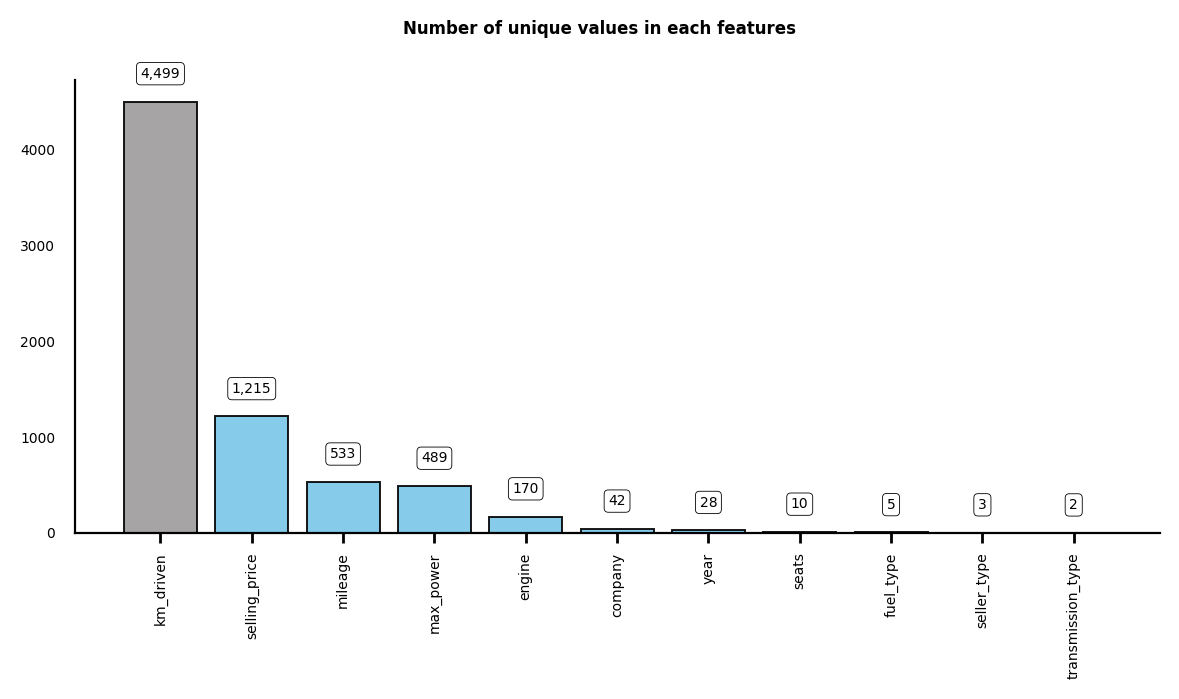

In [28]:
x = cars_data.nunique().sort_values(ascending = False).index
y = cars_data.nunique().sort_values(ascending= False).values

plt.rcParams['figure.dpi'] = 200
fig = plt.figure(figsize = (7,3))
gs = fig.add_gridspec(1,1)
ax0 = fig.add_subplot(gs[0,0])
for i  in ['top', 'right']:
    ax0.spines[i].set_visible(False)

colormap = ['#79c6e8' for i in range(cars_data.shape[1])]
colormap[0] = '#9c9a9a'

ax0.bar(x=x, height=y, edgecolor='k', linewidth=0.7, color=colormap, alpha=0.9)
ax0.tick_params(axis='x',labelsize=5, rotation=90, width=1)
ax0.tick_params(axis='y', labelsize=5, left=False)
fig.suptitle(t='Number of unique values in each features', fontsize=6, weight='bold')

for p in ax0.patches:
    value = f'{p.get_height():,.0f}'
    x = p.get_x() + p.get_width()/2
    y = p.get_y() + p.get_height()+290
    ax0.text(x, y, value, ha='center', va='center', fontsize=5, 
            bbox=dict(facecolor='white', edgecolor='black', boxstyle='round', linewidth=0.3))
plt.show()

Univariate analysis in numerical features

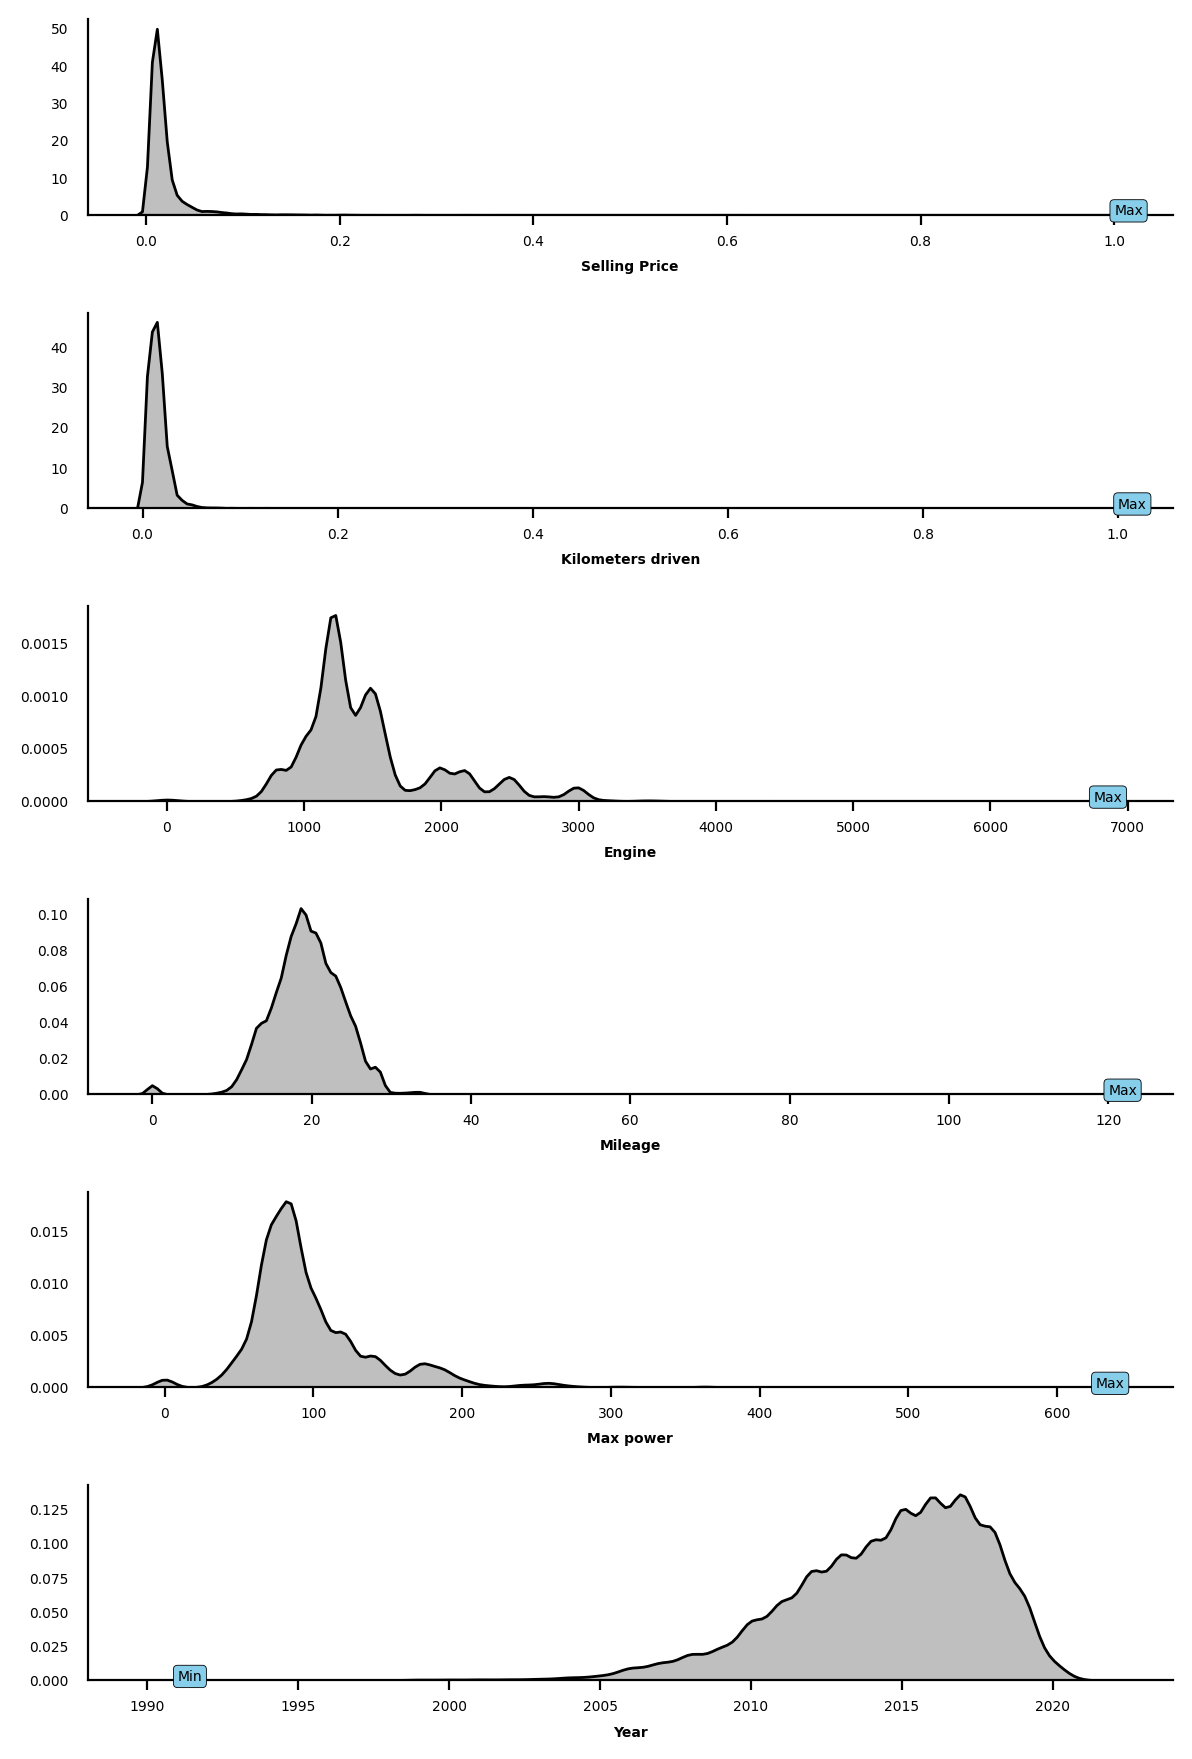

In [29]:
plt.rcParams['figure.dpi'] = 200
fig = plt.figure(figsize=(7,11))
# fig.suptitle(t='Distribution of numerical features', fontsize=6, weight='bold')
gs = fig.add_gridspec(6,1)
gs.update(hspace=0.5)

mi=cars_data.selling_price.min()
ma=cars_data.selling_price.max()
price = (cars_data.selling_price-mi)/(ma-mi)
ax0 = fig.add_subplot(gs[0,0])
ax0_sns = sns.kdeplot(x=price, shade=True, color='k')
ax0.text(x=price.max(), y=0, s='Max', fontsize=5, bbox=dict(facecolor='skyblue',linewidth=0.3,boxstyle='round'))
ax0_sns.tick_params(axis='both', labelsize=5, left=False)
ax0_sns.set_xlabel('Selling Price', fontsize=5, weight='bold')
ax0_sns.set_ylabel(None)

mi=cars_data.km_driven.min()
ma=cars_data.km_driven.max()
driven = (cars_data.km_driven-mi)/(ma-mi)
ax1 = fig.add_subplot(gs[1,0])
ax1_sns = sns.kdeplot(x=driven, shade=True, color='k')
ax1.text(x=driven.max(), y=0, s='Max', fontsize=5, bbox=dict(facecolor='skyblue',linewidth=0.3,boxstyle='round'))
ax1_sns.tick_params(axis='both', labelsize=5, left=False)
ax1_sns.set_xlabel('Kilometers driven', fontsize=5, weight='bold')
ax1_sns.set_ylabel(None)

ax2 = fig.add_subplot(gs[2,0])
ax2_sns = sns.kdeplot(data=cars_data,x='engine', shade=True, color='k')
ax2.text(x=cars_data.engine.max(), y=0, s='Max', fontsize=5, bbox=dict(facecolor='skyblue',linewidth=0.3,boxstyle='round'))
ax2_sns.tick_params(axis='both', labelsize=5, left=False)
ax2_sns.set_xlabel('Engine', fontsize=5, weight='bold')
ax2_sns.set_ylabel(None)

ax3 = fig.add_subplot(gs[3,0])
ax3_sns = sns.kdeplot(data=cars_data,x='mileage', shade=True, color='k')
ax3.text(x=cars_data.mileage.max(), y=0, s='Max', fontsize=5, bbox=dict(facecolor='skyblue',linewidth=0.3,boxstyle='round'))
ax3_sns.tick_params(axis='both', labelsize=5, left=False)
ax3_sns.set_xlabel('Mileage', fontsize=5, weight='bold')
ax3_sns.set_ylabel(None)

ax4 = fig.add_subplot(gs[4,0])
ax4_sns = sns.kdeplot(data=cars_data,x='max_power', shade=True, color='k')
ax4.text(x=cars_data.max_power.max(), y=0, s='Max', fontsize=5, bbox=dict(facecolor='skyblue',linewidth=0.3,boxstyle='round'))
ax4_sns.tick_params(axis='both', labelsize=5, left=False)
ax4_sns.set_xlabel('Max power', fontsize=5, weight='bold')
ax4_sns.set_ylabel(None)

ax5 = fig.add_subplot(gs[5,0])
ax5_sns = sns.kdeplot(data=cars_data,x='year', shade=True, color='k')
ax5.text(x=cars_data.year.min(), y=0, s='Min', fontsize=5, bbox=dict(facecolor='skyblue',linewidth=0.3,boxstyle='round'))
ax5_sns.tick_params(axis='both', labelsize=5, left=False)
ax5_sns.set_xlabel('Year', fontsize=5, weight='bold')
ax5_sns.set_ylabel(None)

sns.despine()
plt.show()

Univariate analysis in categorical features

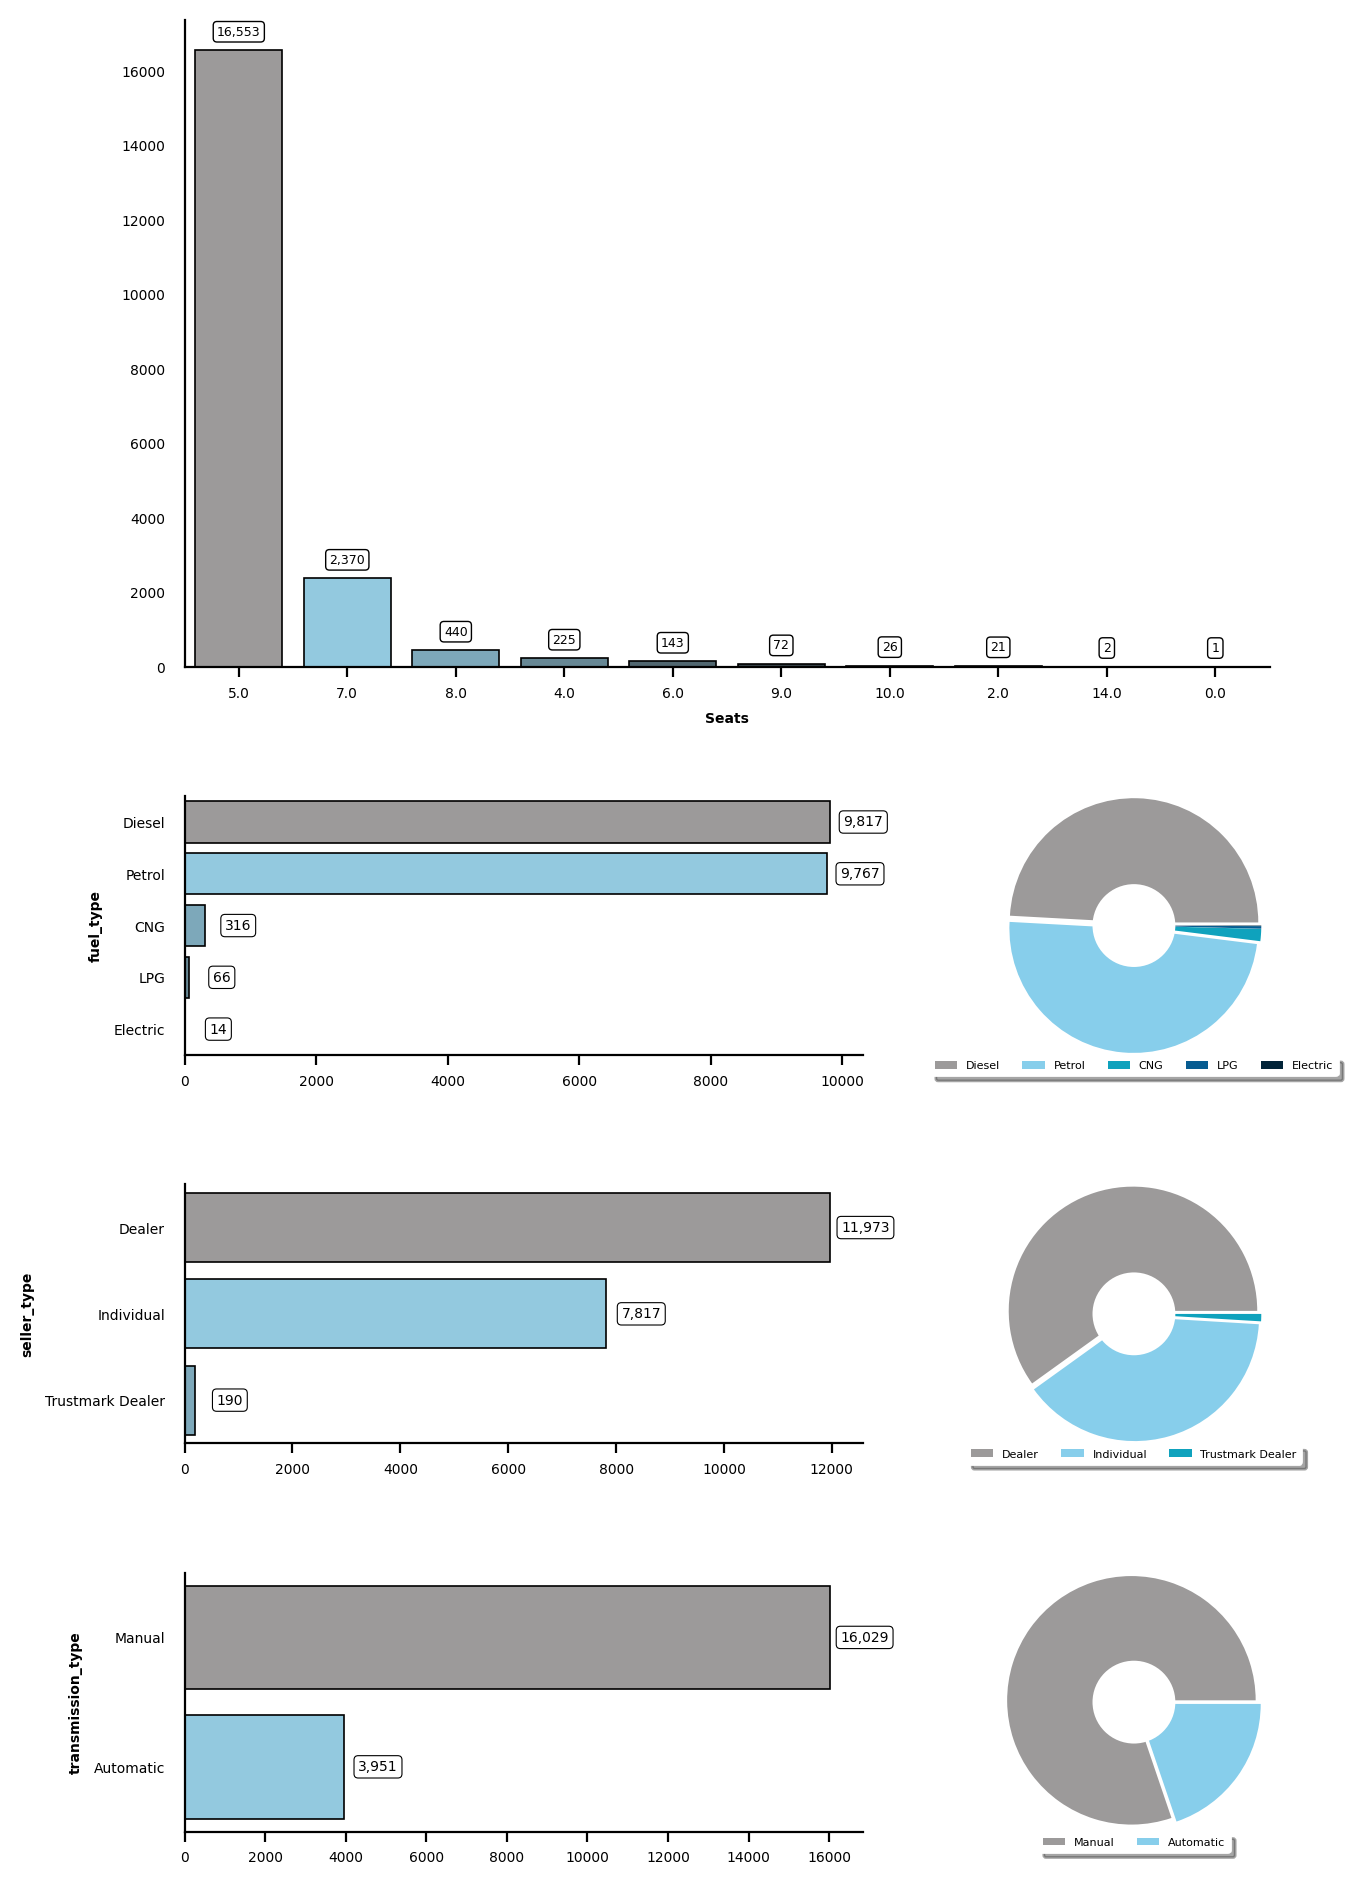

In [30]:
fig = plt.figure(figsize=(7,12))
gs = fig.add_gridspec(5,3)
gs.update(hspace=0.5, wspace=0.5)

pal = sns.dark_palette('skyblue', reverse=True)
pal.insert(0, '#9c9a9a')
# Row 1 ----------------------------------------------------------------------------------------------------------
# Countplot
ax0 = fig.add_subplot(gs[0:2,0:3])
ax0_s = sns.countplot(data=cars_data,
                      x='seats', 
                      palette=pal, 
                      edgecolor='k', 
                      linewidth=0.6, 
                      order=[i for i in cars_data.seats.value_counts().index])
ax0_s.tick_params(labelsize=5, left=False)
ax0_s.set_xlabel(xlabel='Seats', fontsize=5, weight='bold')
ax0_s.set_ylabel(None)

for p in ax0_s.patches:
    value = f"{p.get_height():,.0f}"
    x = p.get_x() + p.get_width()/2
    y = p.get_y() + p.get_height()+500
    ax0.text(x, y, value, fontsize=4.5, ha='center', va='center', 
             bbox=dict(facecolor='white', edgecolor='k', boxstyle='round', linewidth=0.5))
    
# Row 2 ----------------------------------------------------------------------------------------------------------- 
# Countplot-----------
ax1 = fig.add_subplot(gs[2,0:2])
ax1_s = sns.countplot(data=cars_data, y='fuel_type', 
                      palette=pal, edgecolor='k', linewidth=0.6, 
                      order=[i for i in cars_data.fuel_type.value_counts().index])
ax1_s.tick_params(labelsize=5, left=False)
ax1_s.set_xlabel(None)
ax1_s.set_ylabel(ylabel='fuel_type', fontsize=5, weight='bold')
for p in ax1_s.patches:
    value = f"{p.get_width():,.0f}"
    x = p.get_x() + p.get_width()+500
    y = p.get_y() + p.get_height()/2
    ax1.text(x, y, value, fontsize=5, ha='center', va='center', 
             bbox=dict(facecolor='white', edgecolor='k', boxstyle='round', linewidth=0.4))
# Pie plot------------ 
ax11 = fig.add_subplot(gs[2,2])
ax11.pie(x = cars_data.fuel_type.value_counts().values,
        colors=['#9c9a9a','skyblue','#0fa2bd','#075c91','#012338'],
        explode = [0.03 for i in range(cars_data.fuel_type.nunique())],
        radius=1.2,
        textprops=dict(fontsize=5))
ax11.add_artist(plt.Circle((0,0),0.4,fc='white'))
ax11.legend(labels = cars_data.fuel_type.value_counts().index, 
            ncol=5, fontsize=4,edgecolor='white', shadow=True, loc='lower center',bbox_to_anchor=(0.5,-0.1))

# Row 3 ------------------------------------------------------------------------------------------------------------
# Countplot-----------
ax2 = fig.add_subplot(gs[3,0:2])
ax2_s = sns.countplot(data=cars_data, y='seller_type', 
                      palette=pal, edgecolor='k', linewidth=0.6, 
                      order=[i for i in cars_data.seller_type.value_counts().index])
ax2_s.tick_params(labelsize=5, left=False)
ax2_s.set_xlabel(None)
ax2_s.set_ylabel(ylabel='seller_type', fontsize=5, weight='bold')
for p in ax2_s.patches:
    value = f"{p.get_width():,.0f}"
    x = p.get_x() + p.get_width()+650
    y = p.get_y() + p.get_height()/2
    ax2.text(x, y, value, fontsize=5, ha='center', va='center', 
             bbox=dict(facecolor='white', edgecolor='k', boxstyle='round', linewidth=0.4))
# Pie plot------------  
ax21 = fig.add_subplot(gs[3,2])
ax21.pie(x = cars_data.seller_type.value_counts().values,
        colors=['#9c9a9a','skyblue','#0fa2bd','#075c91','#012338'],
        explode = [0.03 for i in range(cars_data.seller_type.nunique())],
        textprops=dict(fontsize=5),
        radius=1.2)
ax21.add_artist(plt.Circle((0,0),0.4,fc='white'))
ax21.legend(labels = cars_data.seller_type.value_counts().index, 
            ncol=3, fontsize=4,edgecolor='white', shadow=True, loc='lower center',bbox_to_anchor=(0.5,-0.1))

# Row 4 ------------------------------------------------------------------------------------------------------------
# Countplot-----------
ax3 = fig.add_subplot(gs[4,0:2])
ax3_s = sns.countplot(data=cars_data, y='transmission_type', 
                      palette=pal, edgecolor='k', linewidth=0.6, 
                      order=[i for i in cars_data.transmission_type.value_counts().index])
ax3_s.tick_params(labelsize=5, left=False)
ax3_s.set_xlabel(None)
ax3_s.set_ylabel(ylabel='transmission_type', fontsize=5, weight='bold')
for p in ax3_s.patches:
    value = f"{p.get_width():,.0f}"
    x = p.get_x() + p.get_width()+850
    y = p.get_y() + p.get_height()/2
    ax3.text(x, y, value, fontsize=5, ha='center', va='center', 
             bbox=dict(facecolor='white', edgecolor='k', boxstyle='round', linewidth=0.4))
# Pie plot------------  
ax31 = fig.add_subplot(gs[4,2])
ax31.pie(x = cars_data.transmission_type.value_counts().values,
        colors=['#9c9a9a','skyblue','#0fa2bd','#075c91','#012338'],
        explode = [0.03 for i in range(cars_data.transmission_type.nunique())],
        textprops=dict(fontsize=5),
        radius=1.2)
ax31.add_artist(plt.Circle((0,0),0.4,fc='white'))
ax31.legend(labels = cars_data.transmission_type.value_counts().index, 
            ncol=2, edgecolor='white',shadow=True, fontsize=4, loc='lower center',bbox_to_anchor=(0.5,-0.1))

sns.despine()
plt.show()

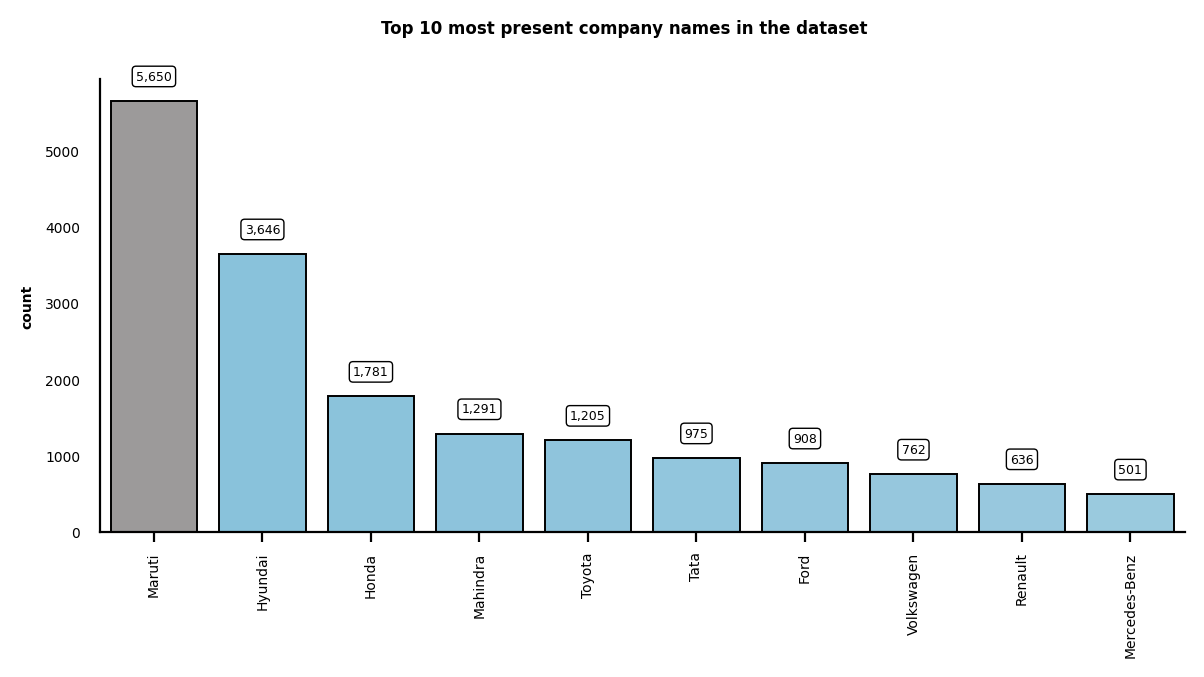

In [31]:
fig = plt.figure(figsize=(7,3))
gs = fig.add_gridspec(1,1)

cars = cars_data.company.value_counts().head(10)
pal = sns.light_palette('#79c6e8', n_colors=50, reverse=True)
pal[0] = '#9c9a9a'
ax = fig.add_subplot(gs[0,0])
ax=sns.barplot(x=cars.index, y=cars.values, edgecolor='k', linewidth=0.7, palette=pal)
ax.tick_params(axis='x', labelsize=5, rotation=90)
ax.tick_params(axis='y', labelsize=5, left=False)
ax.set_ylabel(ylabel='count', fontsize=5, weight='bold')

for p in ax.patches:
    value = f'{p.get_height():,.0f}'
    x = p.get_x() + p.get_width()/2
    y = p.get_y() + p.get_height()+320
    ax.text(x=x, y=y, s=value, fontsize=4.5, ha='center', va='center',
           bbox=dict(fc='white', edgecolor='k', boxstyle='round', linewidth=0.5))
    
fig.suptitle(t='Top 10 most present company names in the dataset', fontsize='6', weight='bold')
sns.despine()
plt.show()

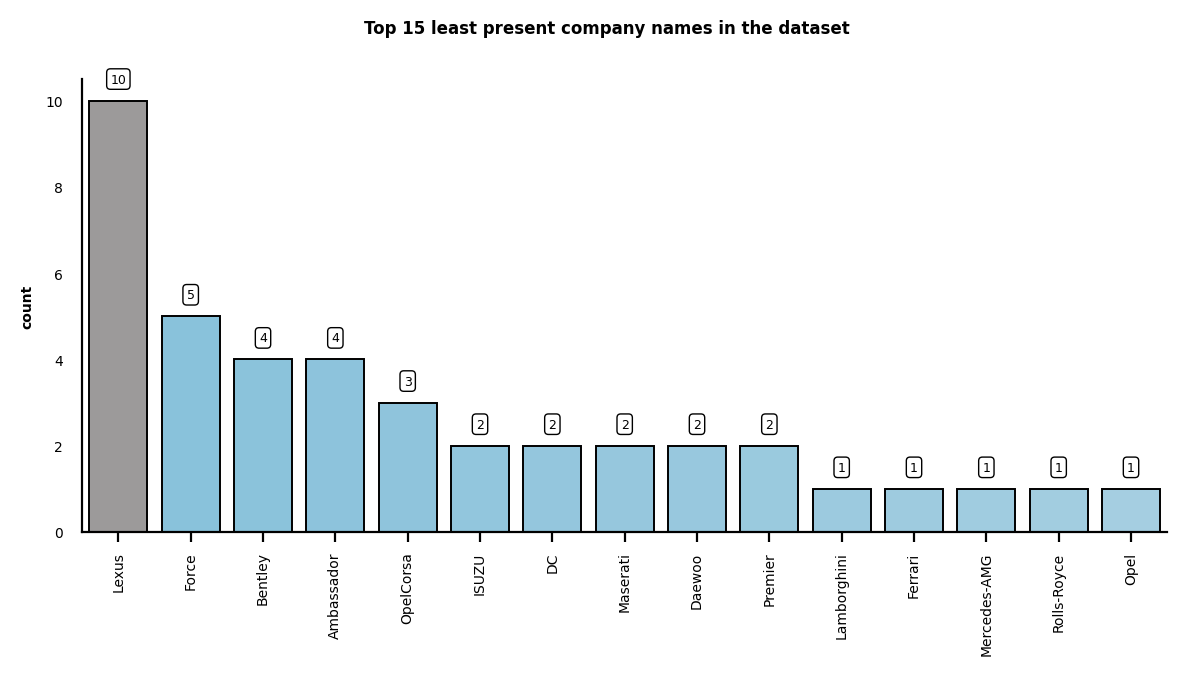

In [32]:
fig = plt.figure(figsize=(7,3))
gs = fig.add_gridspec(1,1)

cars = cars_data.company.value_counts().tail(15)
pal = sns.light_palette('#79c6e8', n_colors=50, reverse=True)
pal[0] = '#9c9a9a'
ax = fig.add_subplot(gs[0,0])
ax=sns.barplot(x=cars.index, y=cars.values, edgecolor='k', linewidth=0.7, palette=pal)
ax.tick_params(axis='x', labelsize=5, rotation=90)
ax.tick_params(axis='y', labelsize=5, left=False)
ax.set_ylabel(ylabel='count', fontsize=5, weight='bold')

for p in ax.patches:
    value = f'{p.get_height():,.0f}'
    x = p.get_x() + p.get_width()/2
    y = p.get_y() + p.get_height()+0.5
    ax.text(x=x, y=y, s=value, fontsize=4.5, ha='center', va='center',
           bbox=dict(fc='white', edgecolor='k', boxstyle='round', linewidth=0.5))
    
fig.suptitle(t='Top 15 least present company names in the dataset', fontsize='6', weight='bold')
sns.despine()
plt.show()

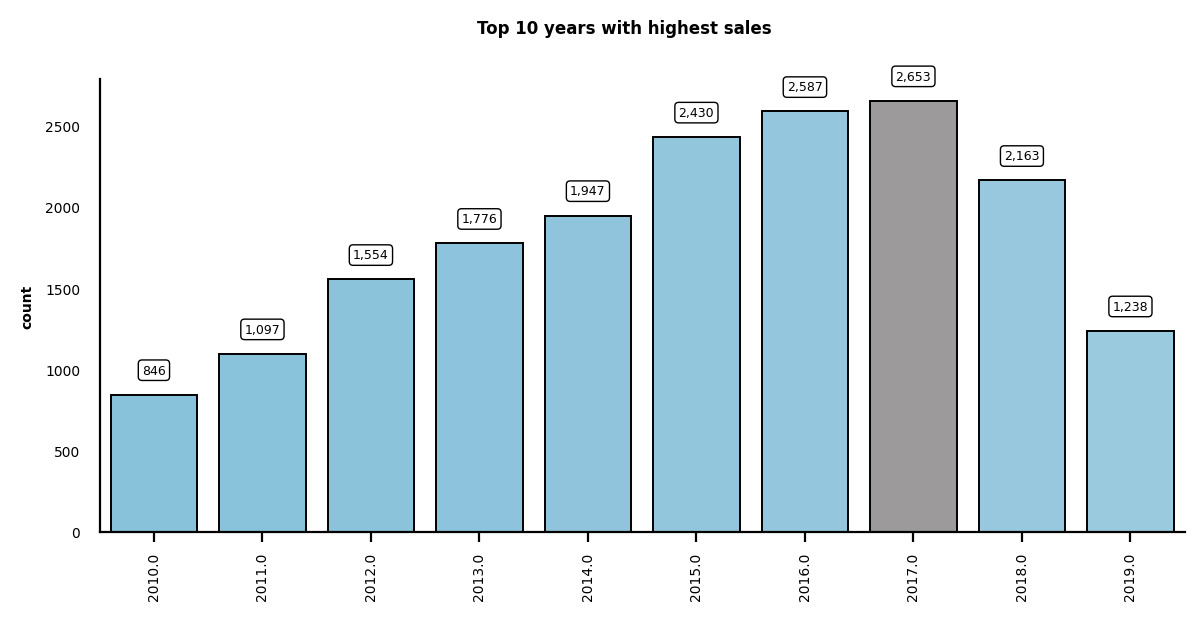

In [33]:
fig = plt.figure(figsize=(7,3))
gs = fig.add_gridspec(1,1)

cars = cars_data.year.value_counts().head(10)
pal = sns.light_palette('#79c6e8', n_colors=50, reverse=True)
pal[7] = '#9c9a9a'
ax = fig.add_subplot(gs[0,0])
ax=sns.barplot(x=cars.index, y=cars.values, edgecolor='k', linewidth=0.7, palette=pal)
ax.tick_params(axis='x', labelsize=5, rotation=90)
ax.tick_params(axis='y', labelsize=5, left=False)
ax.set_ylabel(ylabel='count', fontsize=5, weight='bold')

for p in ax.patches:
    value = f'{p.get_height():,.0f}'
    x = p.get_x() + p.get_width()/2
    y = p.get_y() + p.get_height()+150
    ax.text(x=x, y=y, s=value, fontsize=4.5, ha='center', va='center',
           bbox=dict(fc='white', edgecolor='k', boxstyle='round', linewidth=0.5))
    
fig.suptitle(t='Top 10 years with highest sales', fontsize='6', weight='bold')
sns.despine()
plt.show()

Bivariate analysis

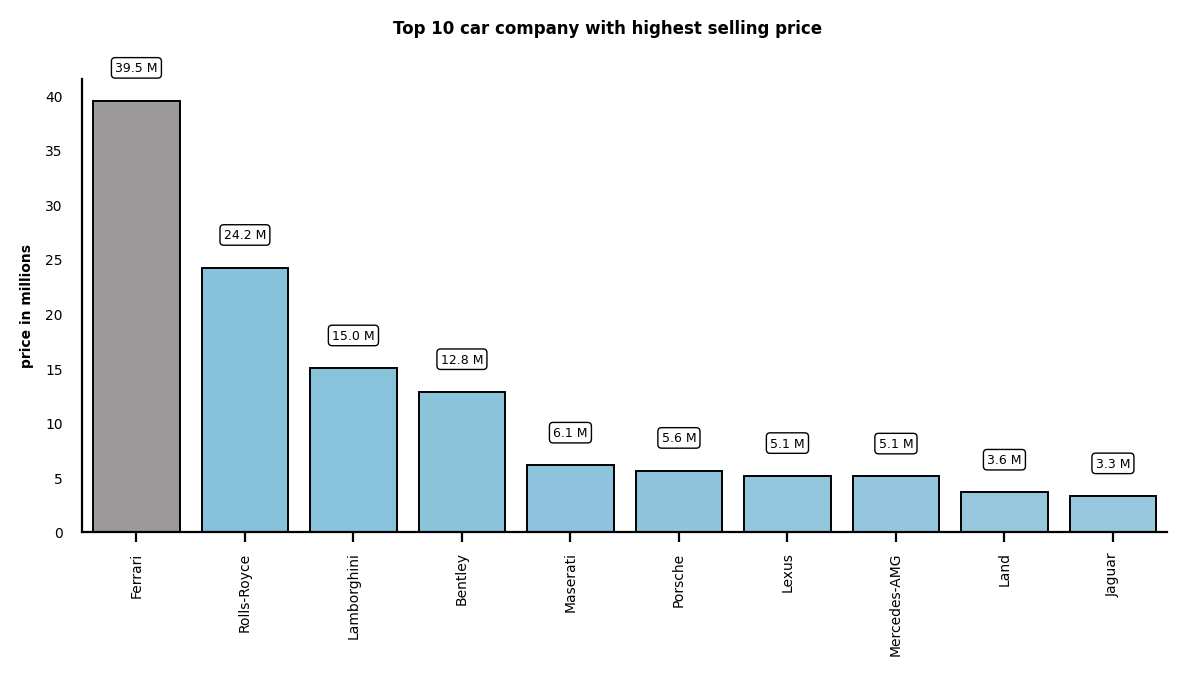

In [34]:
fig = plt.figure(figsize=(7,3))
gs = fig.add_gridspec(1,1)

pal = sns.light_palette('#79c6e8', reverse=True, n_colors=50)
pal.insert(0,'#9c9a9a')

cars = cars_data.groupby('company')['selling_price'].mean().sort_values(ascending=False).head(10)/1000000
ax = fig.add_subplot(gs[0,0])
ax=sns.barplot(x=cars.index, y=cars.values, edgecolor='k', linewidth=0.7, palette=pal)
ax.tick_params(axis='x', labelsize=5, rotation=90)
ax.tick_params(axis='y', labelsize=5, left=False)
ax.set_xlabel(xlabel=None)
ax.set_ylabel(ylabel='price in millions', fontsize=5, weight='bold')
for p in ax.patches:
    value = f'{p.get_height():,.1f}' + ' M'
    x = p.get_x() + p.get_width()/2
    y = p.get_y() + p.get_height()+3
    ax.text(x=x, y=y, s=value, fontsize=4.5, ha='center', va='center',
           bbox=dict(fc='white', edgecolor='k', boxstyle='round', linewidth=0.5))
    
fig.suptitle(t='Top 10 car company with highest selling price', fontsize=6, weight='bold')
sns.despine()
plt.show()

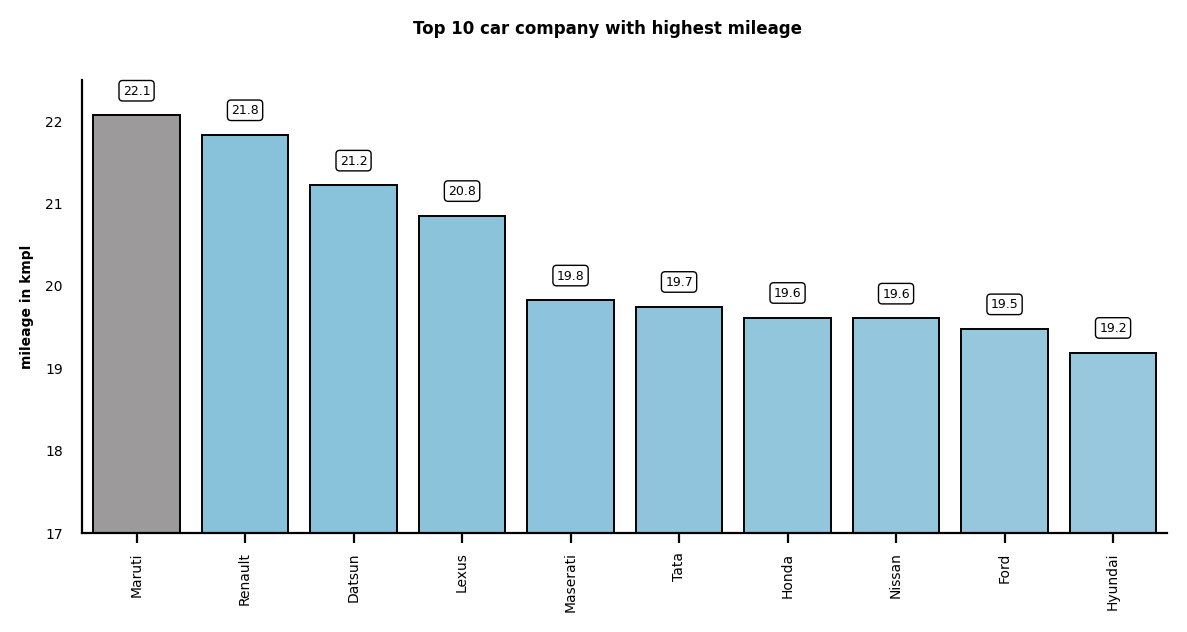

In [35]:
fig = plt.figure(figsize=(7,3))
gs = fig.add_gridspec(1,1)

pal = sns.light_palette('#79c6e8', reverse=True, n_colors=50)
pal.insert(0,'#9c9a9a')

cars = cars_data.groupby('company')['mileage'].mean().sort_values(ascending=False).head(10)
ax = fig.add_subplot(gs[0,0])
ax=sns.barplot(x=cars.index, y=cars.values, edgecolor='k', linewidth=0.7, palette=pal)
ax.tick_params(axis='x', labelsize=5, rotation=90)
ax.tick_params(axis='y', labelsize=5, left=False)
ax.set_xlabel(xlabel=None)
ax.set_ylabel(ylabel='mileage in kmpl', fontsize=5, weight='bold')
ax.set_ylim(17,22.5)

for p in ax.patches:
    value = f'{p.get_height():,.1f}'
    x = p.get_x() + p.get_width()/2
    y = p.get_y() + p.get_height()+0.3
    ax.text(x=x, y=y, s=value, fontsize=4.5, ha='center', va='center',
           bbox=dict(fc='white', edgecolor='k', boxstyle='round', linewidth=0.5))
    
fig.suptitle(t='Top 10 car company with highest mileage', fontsize=6, weight='bold')
sns.despine()
plt.show()

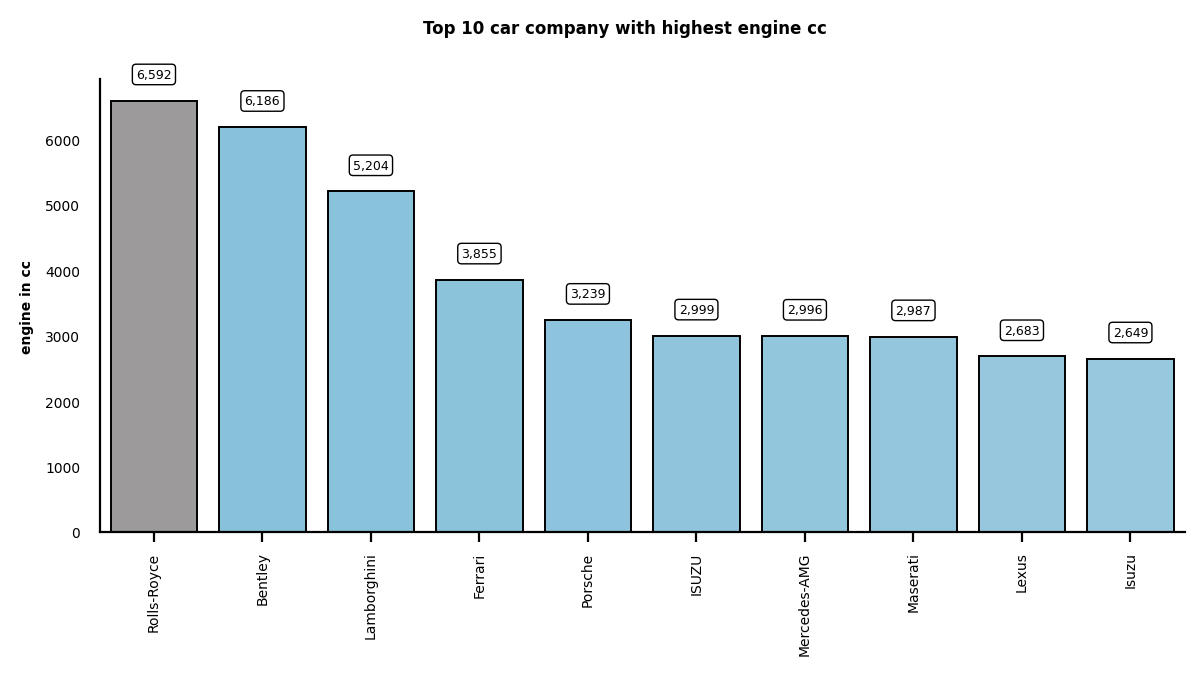

In [36]:
fig = plt.figure(figsize=(7,3))
gs = fig.add_gridspec(1,1)

pal = sns.light_palette('#79c6e8', reverse=True, n_colors=50)
pal.insert(0,'#9c9a9a')

cars = cars_data.groupby('company')['engine'].mean().sort_values(ascending=False).head(10)
ax = fig.add_subplot(gs[0,0])
ax=sns.barplot(x=cars.index, y=cars.values, edgecolor='k', linewidth=0.7, palette=pal)
ax.tick_params(axis='x', labelsize=5, rotation=90)
ax.tick_params(axis='y', labelsize=5, left=False)
ax.set_xlabel(xlabel=None)
ax.set_ylabel(ylabel='engine in cc', fontsize=5, weight='bold')
for p in ax.patches:
    value = f'{p.get_height():,.0f}'
    x = p.get_x() + p.get_width()/2
    y = p.get_y() + p.get_height()+400
    ax.text(x=x, y=y, s=value, fontsize=4.5, ha='center', va='center',
           bbox=dict(fc='white', edgecolor='k', boxstyle='round', linewidth=0.5))
    
fig.suptitle(t='Top 10 car company with highest engine cc', fontsize=6, weight='bold')
sns.despine()
plt.show()

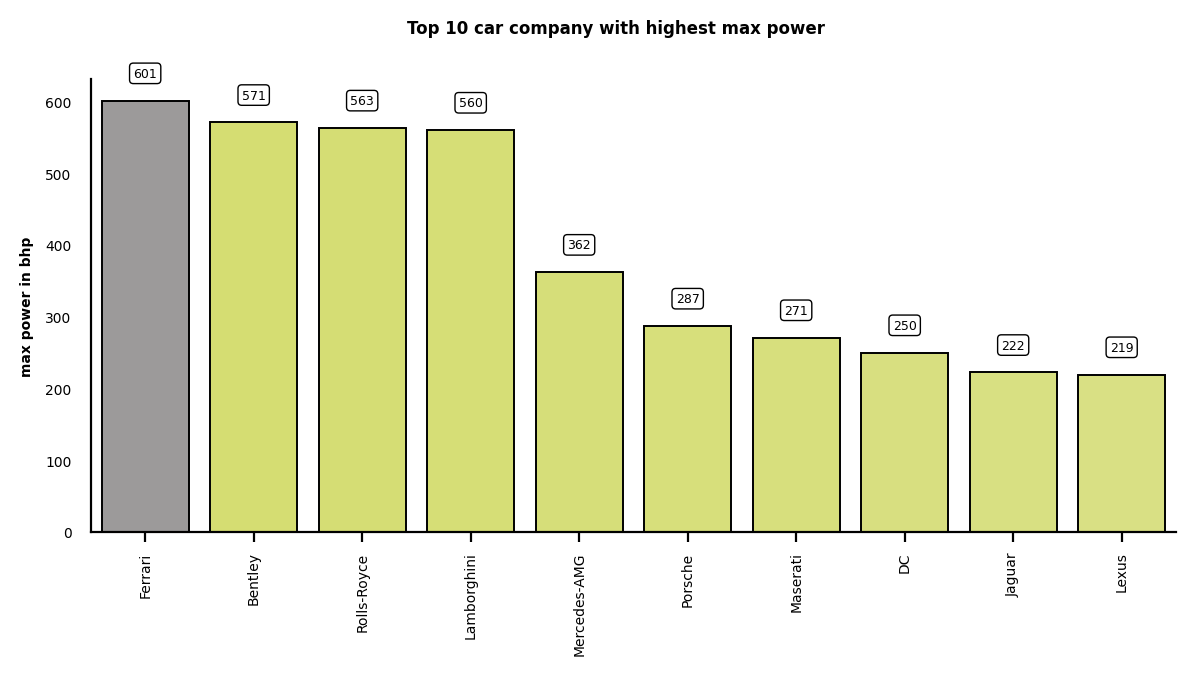

In [37]:
fig = plt.figure(figsize=(7,3))
gs = fig.add_gridspec(1,1)

pal = sns.light_palette('#E4EF60', reverse=True, n_colors=50)
pal.insert(0,'#9c9a9a')

cars = cars_data.groupby('company')['max_power'].mean().sort_values(ascending=False).head(10)
ax = fig.add_subplot(gs[0,0])
ax=sns.barplot(x=cars.index, y=cars.values, edgecolor='k', linewidth=0.7, palette=pal)
ax.tick_params(axis='x', labelsize=5, rotation=90)
ax.tick_params(axis='y', labelsize=5, left=False)
ax.set_xlabel(xlabel=None)
ax.set_ylabel(ylabel='max power in bhp', fontsize=5, weight='bold')
for p in ax.patches:
    value = f'{p.get_height():,.0f}'
    x = p.get_x() + p.get_width()/2
    y = p.get_y() + p.get_height()+38
    ax.text(x=x, y=y, s=value, fontsize=4.5, ha='center', va='center',
           bbox=dict(fc='white', edgecolor='k', boxstyle='round', linewidth=0.5))
    
fig.suptitle(t='Top 10 car company with highest max power', fontsize=6, weight='bold')
sns.despine()
plt.show()

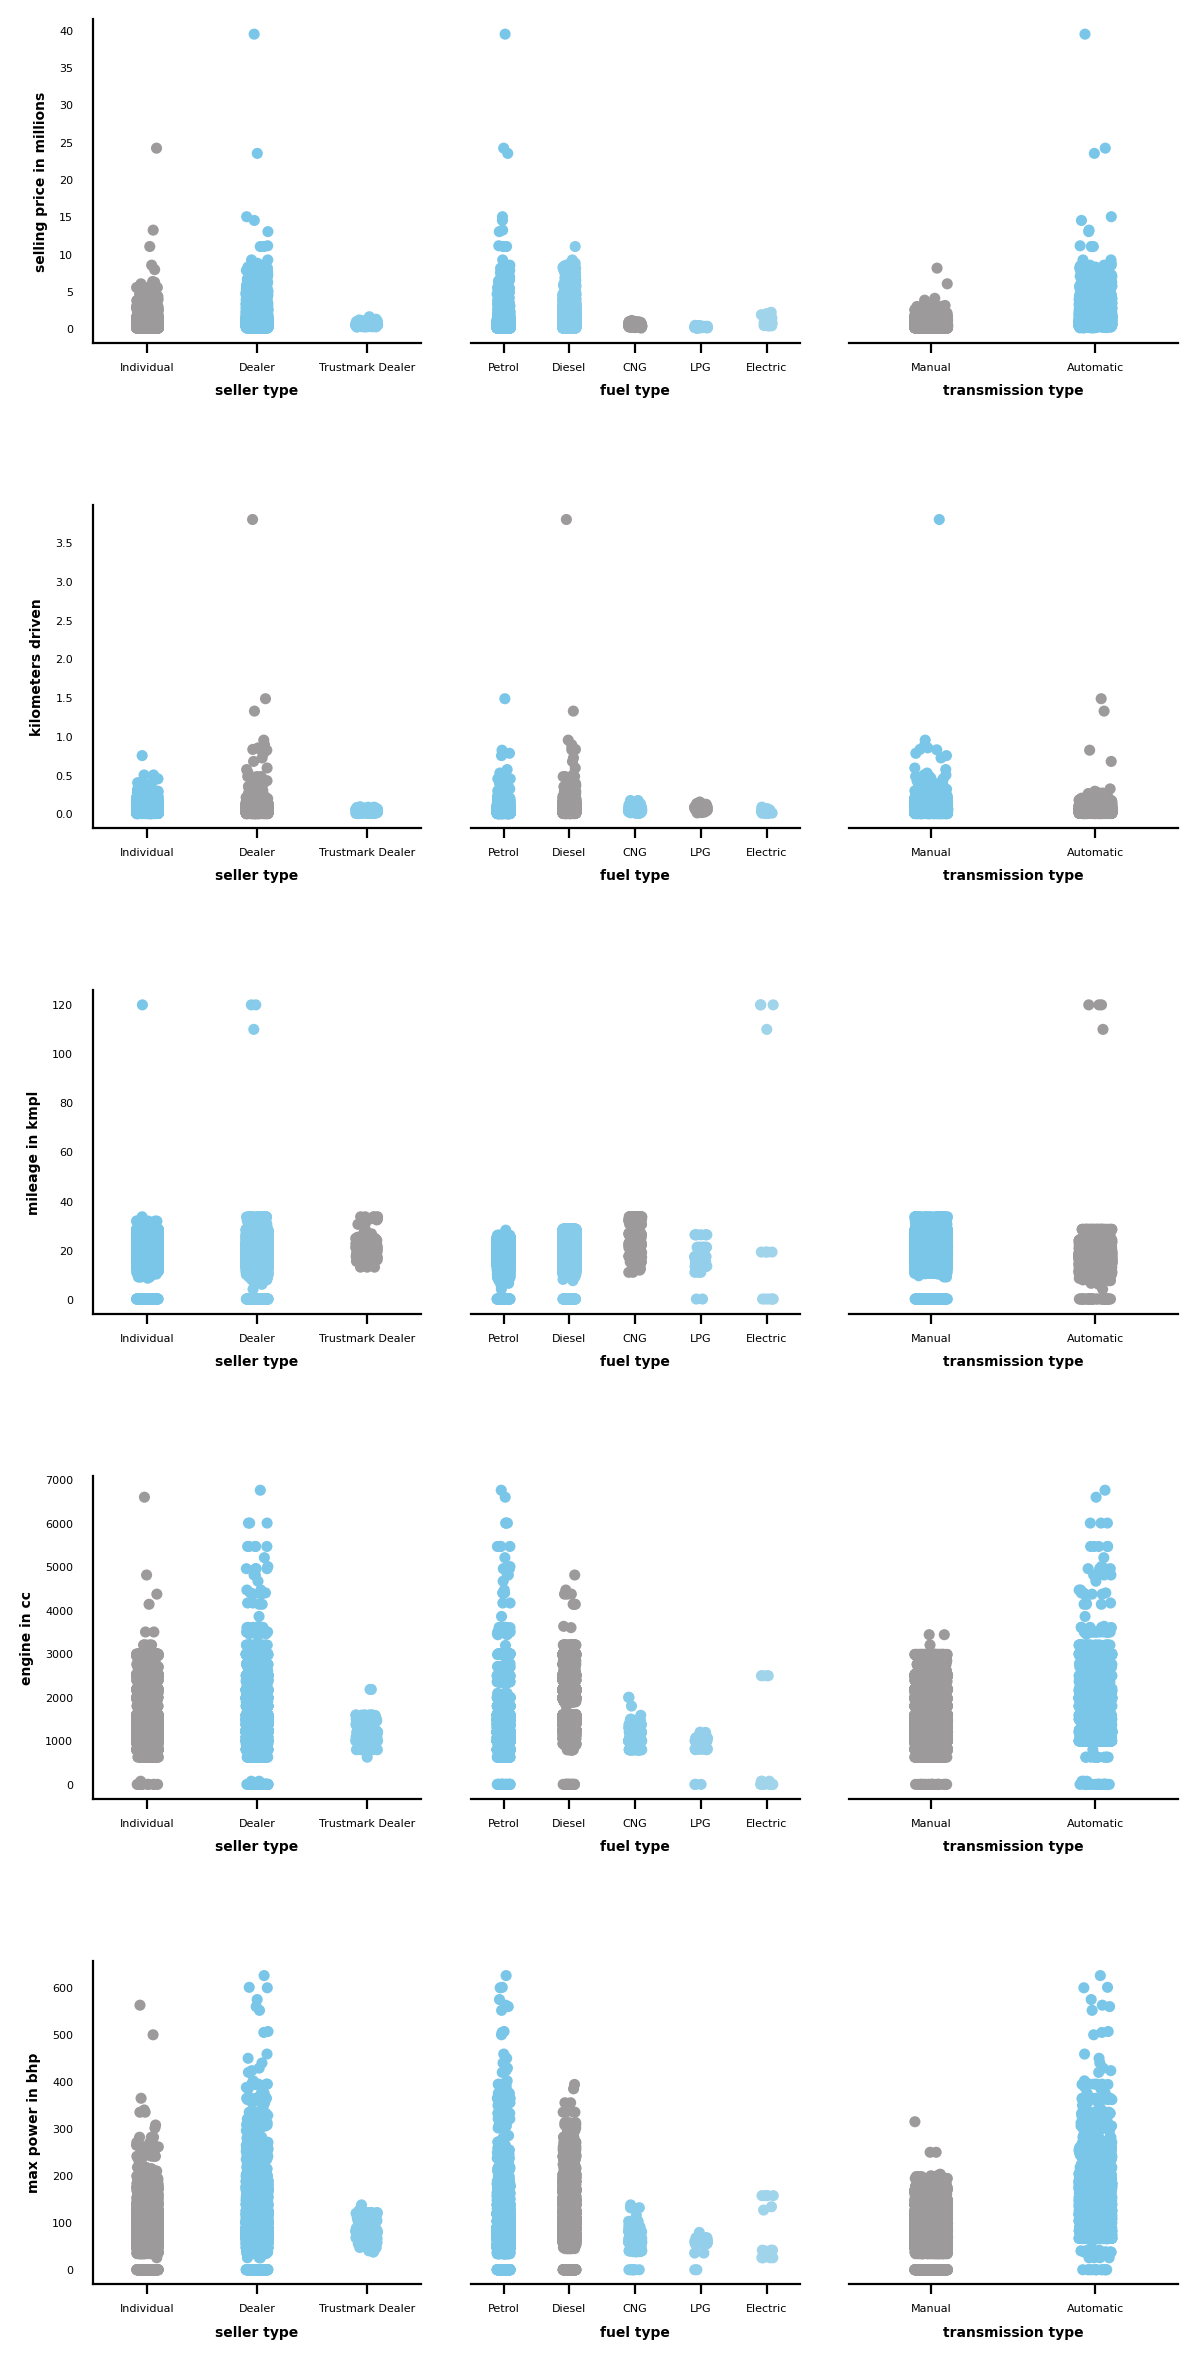

In [38]:
fig = plt.figure(figsize=(7,15))
gs = fig.add_gridspec(5,3)
gs.update(hspace=0.5, wspace=0.15)



# Row 1 selling_price-----------------------------------------------------------------
ax00 = fig.add_subplot(gs[0,0])
pal = sns.light_palette('#79c6e8', reverse=True, n_colors=10)
pal.insert(0,'#9c9a9a')
ax00_s = sns.stripplot(x=cars_data.seller_type, y=cars_data.selling_price/1000000, size=4, palette=pal)
ax00_s.tick_params(labelsize=4, left=False)
ax00_s.set_xlabel(xlabel='seller type', fontsize=5, weight='bold')
ax00_s.set_ylabel(ylabel='selling price in millions', fontsize=5, weight='bold')
for i in ['top', 'right']:
    ax00.spines[i].set_visible(False)

ax01 = fig.add_subplot(gs[0,1])
pal = sns.light_palette('#79c6e8', reverse=True, n_colors=10)
pal.insert(2,'#9c9a9a')
ax01_s = sns.stripplot(x=cars_data.fuel_type, y=cars_data.selling_price/1000000, size=4, palette=pal)
ax01_s.tick_params(labelsize=4, left=False)
ax01_s.set_xlabel(xlabel='fuel type', fontsize=5, weight='bold')
ax01_s.set_ylabel(ylabel=None)
ax01_s.set_yticks([])
for i in ['top', 'right', 'left']:
    ax01.spines[i].set_visible(False)

ax02 = fig.add_subplot(gs[0,2])
pal = sns.light_palette('#79c6e8', reverse=True, n_colors=10)
pal.insert(0,'#9c9a9a')
ax02_s = sns.stripplot(x=cars_data.transmission_type, y=cars_data.selling_price/1000000, size=4, palette=pal)
ax02_s.tick_params(labelsize=4, left=False)
ax02_s.set_xlabel(xlabel='transmission type', fontsize=5, weight='bold')
ax02_s.set_ylabel(ylabel=None)
ax02_s.set_yticks([])
for i in ['top', 'right', 'left']:
    ax02.spines[i].set_visible(False)

# Row 2 km_driven-------------------------------------------------------------------------
ax10 = fig.add_subplot(gs[1,0])
pal = sns.light_palette('#79c6e8', reverse=True, n_colors=10)
pal.insert(1,'#9c9a9a')
ax10_s = sns.stripplot(x=cars_data.seller_type, y=cars_data.km_driven/1000000, size=4, palette=pal)
ax10_s.tick_params(labelsize=4, left=False)
ax10_s.set_xlabel(xlabel='seller type', fontsize=5, weight='bold')
ax10_s.set_ylabel(ylabel='kilometers driven', fontsize=5, weight='bold')
for i in ['top', 'right']:
    ax10.spines[i].set_visible(False)

ax11 = fig.add_subplot(gs[1,1])
pal = sns.light_palette('#79c6e8', reverse=True, n_colors=10)
pal.insert(1,'#9c9a9a')
pal.insert(3,'#9c9a9a')
ax11_s = sns.stripplot(x=cars_data.fuel_type, y= cars_data.km_driven/1000000, size=4, palette=pal)
ax11_s.tick_params(labelsize=4, left=False)
ax11_s.set_xlabel(xlabel='fuel type', fontsize=5, weight='bold')
ax11_s.set_ylabel(ylabel=None)
ax11_s.set_yticks([])
for i in ['top', 'right', 'left']:
    ax11.spines[i].set_visible(False)

ax12 = fig.add_subplot(gs[1,2])
pal = sns.light_palette('#79c6e8', reverse=True, n_colors=10)
pal.insert(1,'#9c9a9a')
ax12_s = sns.stripplot(x=cars_data.transmission_type, y=cars_data.km_driven/1000000, size=4, palette=pal)
ax12_s.tick_params(labelsize=4, left=False)
ax12_s.set_xlabel(xlabel='transmission type', fontsize=5, weight='bold')
ax12_s.set_ylabel(ylabel=None)
ax12_s.set_yticks([])
for i in ['top', 'right', 'left']:
    ax12.spines[i].set_visible(False)

# Row 3 mileage---------------------------------------------------------------------------
ax20 = fig.add_subplot(gs[2,0])
pal = sns.light_palette('#79c6e8', reverse=True, n_colors=10)
pal.insert(2,'#9c9a9a')
ax20_s = sns.stripplot(x=cars_data.seller_type, y=cars_data.mileage, size=4, palette=pal)
ax20_s.tick_params(labelsize=4, left=False)
ax20_s.set_xlabel(xlabel='seller type', fontsize=5, weight='bold')
ax20_s.set_ylabel(ylabel='mileage in kmpl', fontsize=5, weight='bold')
for i in ['top', 'right']:
    ax20.spines[i].set_visible(False)

ax21 = fig.add_subplot(gs[2,1])
pal = sns.light_palette('#79c6e8', reverse=True, n_colors=10)
pal.insert(2,'#9c9a9a')
ax21_s = sns.stripplot(x=cars_data.fuel_type, y=cars_data.mileage, size=4, palette=pal)
ax21_s.tick_params(labelsize=4, left=False)
ax21_s.set_xlabel(xlabel='fuel type', fontsize=5, weight='bold')
ax21_s.set_ylabel(ylabel=None)
ax21_s.set_yticks([])
for i in ['top', 'right', 'left']:
    ax21.spines[i].set_visible(False)

ax22 = fig.add_subplot(gs[2,2])
pal = sns.light_palette('#79c6e8', reverse=True, n_colors=10)
pal.insert(1,'#9c9a9a')
ax22_s = sns.stripplot(x=cars_data.transmission_type, y=cars_data.mileage, size=4, palette=pal)
ax22_s.tick_params(labelsize=4, left=False)
ax22_s.set_xlabel(xlabel='transmission type', fontsize=5, weight='bold')
ax22_s.set_ylabel(ylabel=None)
ax22_s.set_yticks([])
for i in ['top', 'right', 'left']:
    ax22.spines[i].set_visible(False)

# Row 4 Engine------------------------------------------------------------------------------
ax30 = fig.add_subplot(gs[3,0])
pal = sns.light_palette('#79c6e8', reverse=True, n_colors=10)
pal.insert(0,'#9c9a9a')
ax30_s = sns.stripplot(x=cars_data.seller_type, y=cars_data.engine, size=4, palette=pal)
ax30_s.tick_params(labelsize=4, left=False)
ax30_s.set_xlabel(xlabel='seller type', fontsize=5, weight='bold')
ax30_s.set_ylabel(ylabel='engine in cc', fontsize=5, weight='bold')
for i in ['top', 'right']:
    ax30.spines[i].set_visible(False)

ax31 = fig.add_subplot(gs[3,1])
pal = sns.light_palette('#79c6e8', reverse=True, n_colors=10)
pal.insert(1,'#9c9a9a')
ax31_s = sns.stripplot(x=cars_data.fuel_type, y=cars_data.engine, size=4, palette=pal)
ax31_s.tick_params(labelsize=4, left=False)
ax31_s.set_xlabel(xlabel='fuel type', fontsize=5, weight='bold')
ax31_s.set_ylabel(ylabel=None)
ax31_s.set_yticks([])
for i in ['top', 'right', 'left']:
    ax31.spines[i].set_visible(False)

ax32 = fig.add_subplot(gs[3,2])
pal = sns.light_palette('#79c6e8', reverse=True, n_colors=10)
pal.insert(0,'#9c9a9a')
ax32_s = sns.stripplot(x=cars_data.transmission_type, y=cars_data.engine, size=4, palette=pal)
ax32_s.tick_params(labelsize=4, left=False)
ax32_s.set_xlabel(xlabel='transmission type', fontsize=5, weight='bold')
ax32_s.set_ylabel(ylabel=None)
ax32_s.set_yticks([])
for i in ['top', 'right', 'left']:
    ax32.spines[i].set_visible(False)

# Row 5 max power------------------------------------------------------------------------------
ax40 = fig.add_subplot(gs[4,0])
pal = sns.light_palette('#79c6e8', reverse=True, n_colors=10)
pal.insert(0,'#9c9a9a')
ax40_s = sns.stripplot(x=cars_data.seller_type, y=cars_data.max_power, size=4, palette=pal)
ax40_s.tick_params(labelsize=4, left=False)
ax40_s.set_xlabel(xlabel='seller type', fontsize=5, weight='bold')
ax40_s.set_ylabel(ylabel='max power in bhp', fontsize=5, weight='bold')
for i in ['top', 'right']:
    ax40.spines[i].set_visible(False)

ax41 = fig.add_subplot(gs[4,1])
pal = sns.light_palette('#79c6e8', reverse=True, n_colors=10)
pal.insert(1,'#9c9a9a')
ax41_s = sns.stripplot(x=cars_data.fuel_type, y=cars_data.max_power, size=4, palette=pal)
ax41_s.tick_params(labelsize=4, left=False)
ax41_s.set_xlabel(xlabel='fuel type', fontsize=5, weight='bold')
ax41_s.set_ylabel(ylabel=None)
ax41_s.set_yticks([])
for i in ['top', 'right', 'left']:
    ax41.spines[i].set_visible(False)

ax42 = fig.add_subplot(gs[4,2])
pal = sns.light_palette('#79c6e8', reverse=True, n_colors=10)
pal.insert(0,'#9c9a9a')
ax42_s = sns.stripplot(x=cars_data.transmission_type, y=cars_data.max_power, size=4, palette=pal)
ax42_s.tick_params(labelsize=4, left=False)
ax42_s.set_xlabel(xlabel='transmission type', fontsize=5, weight='bold')
ax42_s.set_ylabel(ylabel=None)
ax42_s.set_yticks([])
for i in ['top', 'right', 'left']:
    ax42.spines[i].set_visible(False)

plt.show()

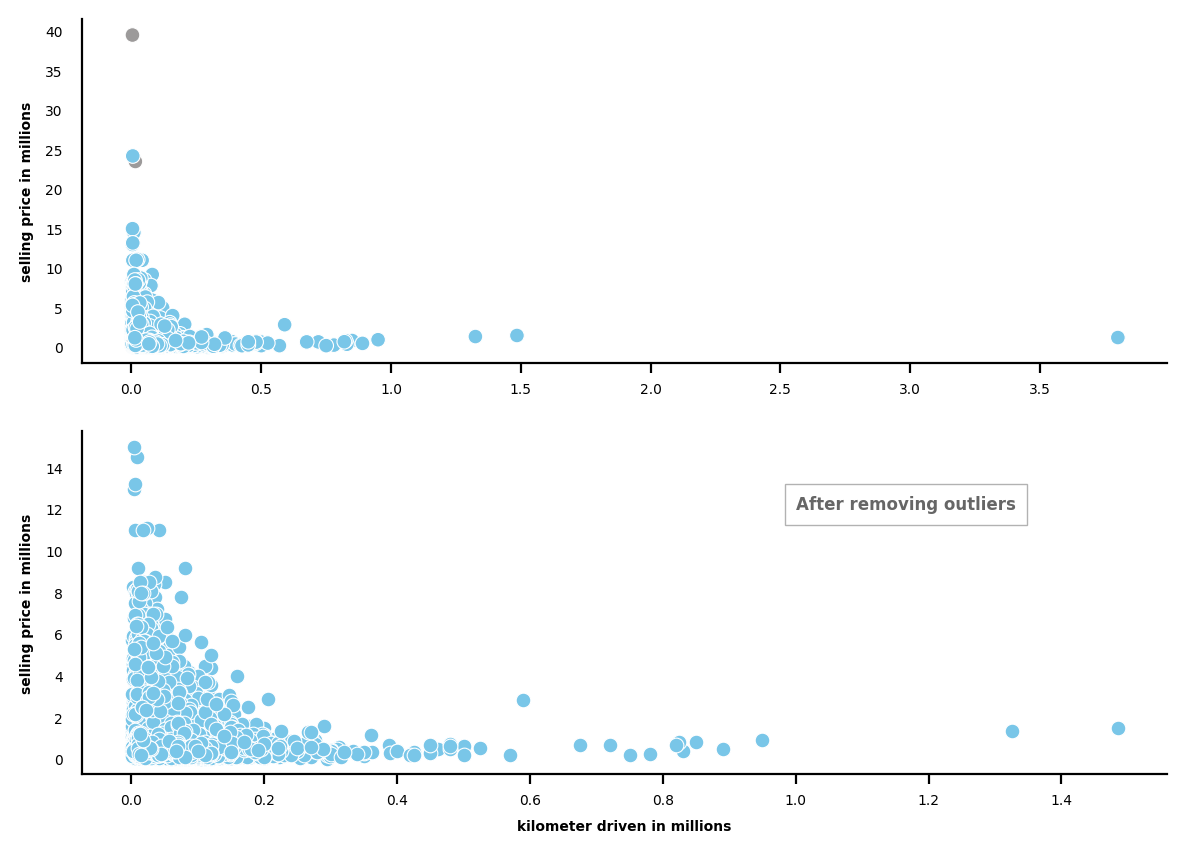

In [39]:
fig = plt.figure(figsize=(7,5))
gs = fig.add_gridspec(2,1)
color = ['#79c6e8' for i in range(cars_data.shape[0])]
color[4967] = color[19972] = color[14257] = color[475] = '#9c9a9a'
ax=fig.add_subplot(gs[0,0])
ax.scatter(x=cars_data.km_driven/1000000,y=cars_data.selling_price/1000000,s=28,
                       color=color, edgecolor='white', linewidth=0.4)
ax.tick_params(labelsize=5, left=False)
ax.set_ylabel(ylabel='selling price in millions', fontsize=5, weight='bold')

ax1=fig.add_subplot(gs[1,0])
rmd_data = cars_data[cars_data['selling_price']<20000000]
rmd_data = rmd_data[rmd_data['km_driven']<2000000]
ax1.scatter(x=rmd_data.km_driven/1000000,y=rmd_data.selling_price/1000000,
            s=28, color='#79c6e8', edgecolor='white', linewidth=0.4)
ax1.tick_params(labelsize=5, left=False)
ax1.set_xlabel(xlabel='kilometer driven in millions', fontsize=5, weight='bold')
ax1.set_ylabel(ylabel='selling price in millions', fontsize=5, weight='bold')
ax1.text(x=1, y=12, s='After removing outliers', fontsize=6, weight='bold', alpha=0.6,
        bbox=dict(facecolor='white', lw=0.5, alpha=0.3))
sns.despine()
plt.show()

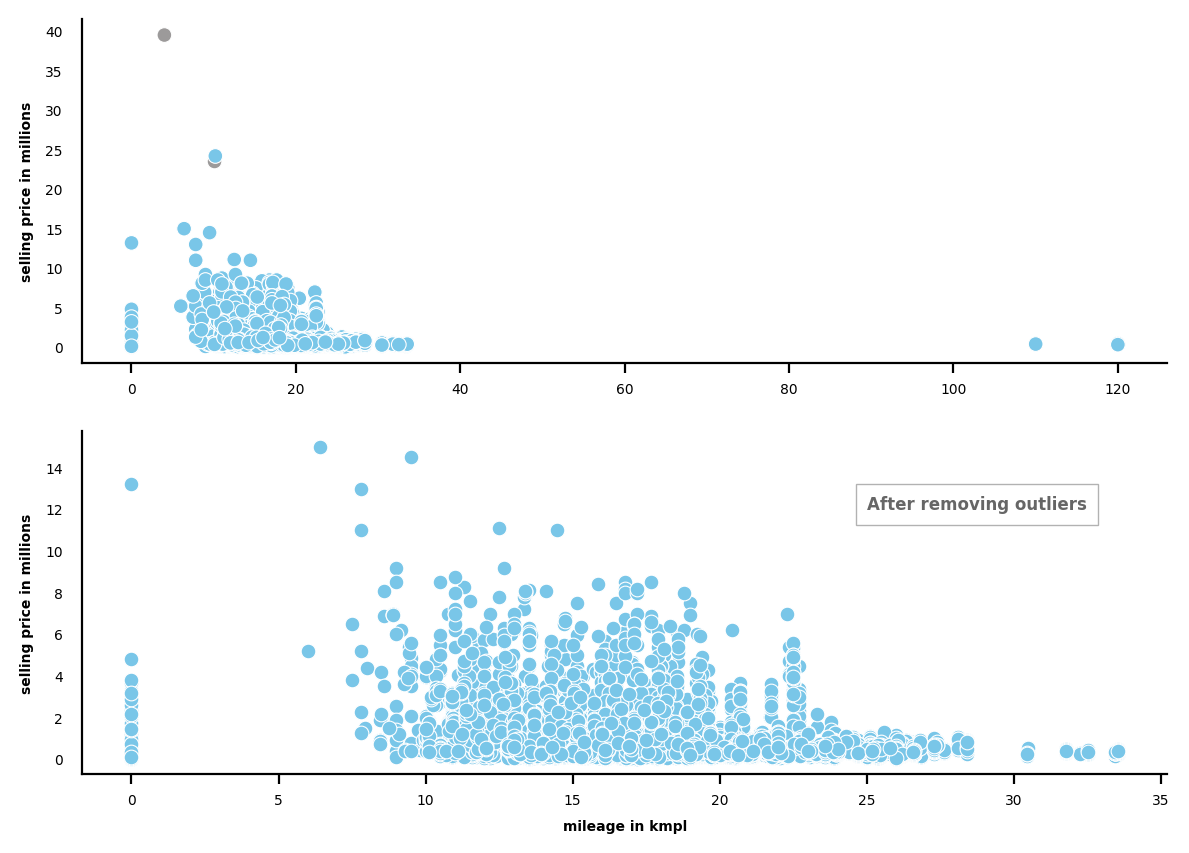

In [40]:
fig = plt.figure(figsize=(7,5))
gs = fig.add_gridspec(2,1)
color = ['#79c6e8' for i in range(cars_data.shape[0])]
color[4967] = color[14257] = color[475] = color[11964] = color[18396]= '#9c9a9a'
ax=fig.add_subplot(gs[0,0])
ax.scatter(x=cars_data.mileage,y=cars_data.selling_price/1000000,s=28,
                       color=color, edgecolor='white', linewidth=0.4)
ax.tick_params(labelsize=5, left=False)
ax.set_ylabel(ylabel='selling price in millions', fontsize=5, weight='bold')

ax1=fig.add_subplot(gs[1,0])
rmd_data = cars_data[cars_data['selling_price']<20000000]
rmd_data = rmd_data[rmd_data['mileage']<100]
ax1.scatter(x=rmd_data.mileage,y=rmd_data.selling_price/1000000,s=28,
                       color='#79c6e8', edgecolor='white', linewidth=0.4)
ax1.tick_params(labelsize=5, left=False)
ax1.set_xlabel(xlabel='mileage in kmpl', fontsize=5, weight='bold')
ax1.set_ylabel(ylabel='selling price in millions', fontsize=5, weight='bold')
ax1.text(x=25, y=12, s='After removing outliers', fontsize=6, weight='bold', alpha=0.6,
        bbox=dict(facecolor='white', lw=0.5, alpha=0.3))
sns.despine()
plt.show()

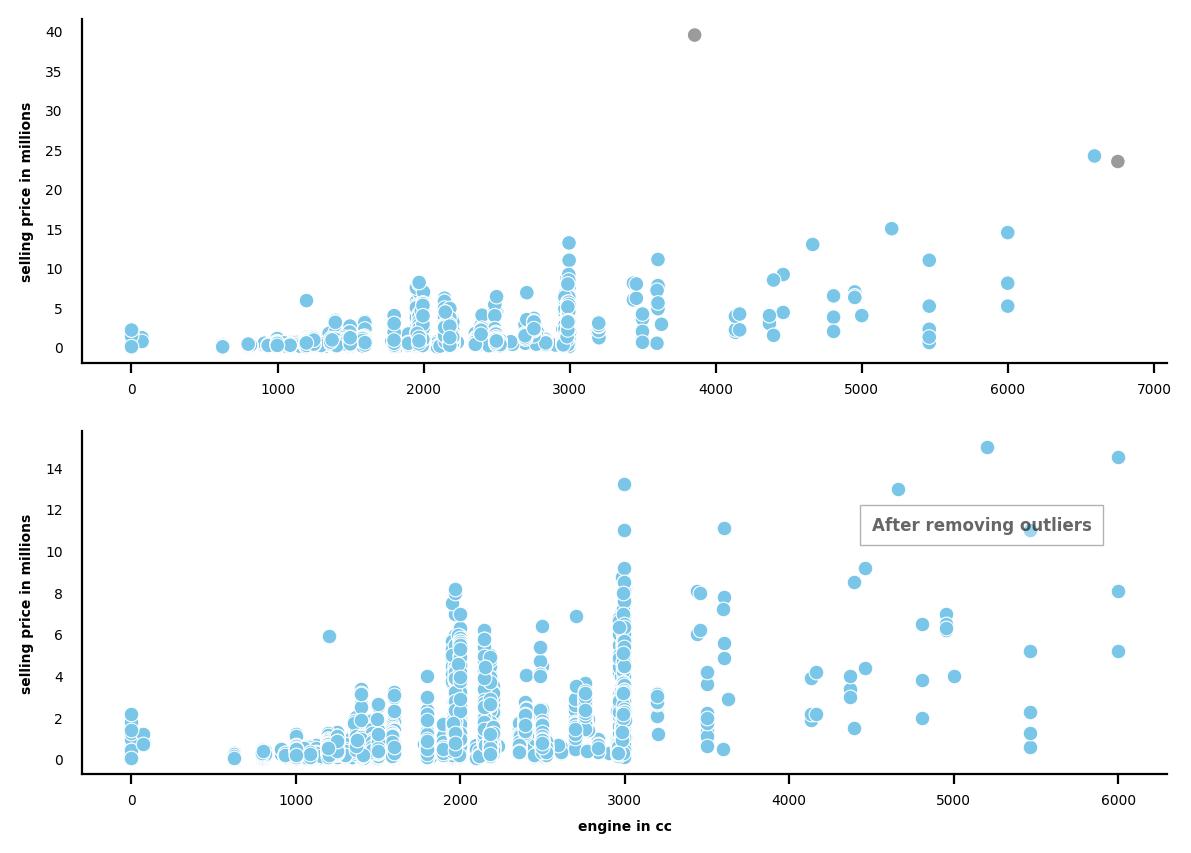

In [41]:
fig = plt.figure(figsize=(7,5))
gs = fig.add_gridspec(2,1)
color = ['#79c6e8' for i in range(cars_data.shape[0])]
color[4967] = color[475] = color[14257] = '#9c9a9a'
ax=fig.add_subplot(gs[0,0])
ax.scatter(x=cars_data.engine,y=cars_data.selling_price/1000000,s=28,
                       color=color, edgecolor='white', linewidth=0.4)
ax.tick_params(labelsize=5, left=False)
ax.set_ylabel(ylabel='selling price in millions', fontsize=5, weight='bold')

ax1=fig.add_subplot(gs[1,0])
rmd_data = cars_data[cars_data['selling_price']<20000000]
rmd_data = rmd_data[rmd_data['engine']<6100]
ax1.scatter(x=rmd_data.engine,y=rmd_data.selling_price/1000000,s=28,
                       color='#79c6e8', edgecolor='white', linewidth=0.4)
ax1.tick_params(labelsize=5, left=False)
ax1.set_xlabel(xlabel='engine in cc', fontsize=5, weight='bold')
ax1.set_ylabel(ylabel='selling price in millions', fontsize=5, weight='bold')
ax1.text(x=4500, y=11, s='After removing outliers', fontsize=6, weight='bold', alpha=0.6,
        bbox=dict(facecolor='white', lw=0.5, alpha=0.3))
sns.despine()
plt.show()

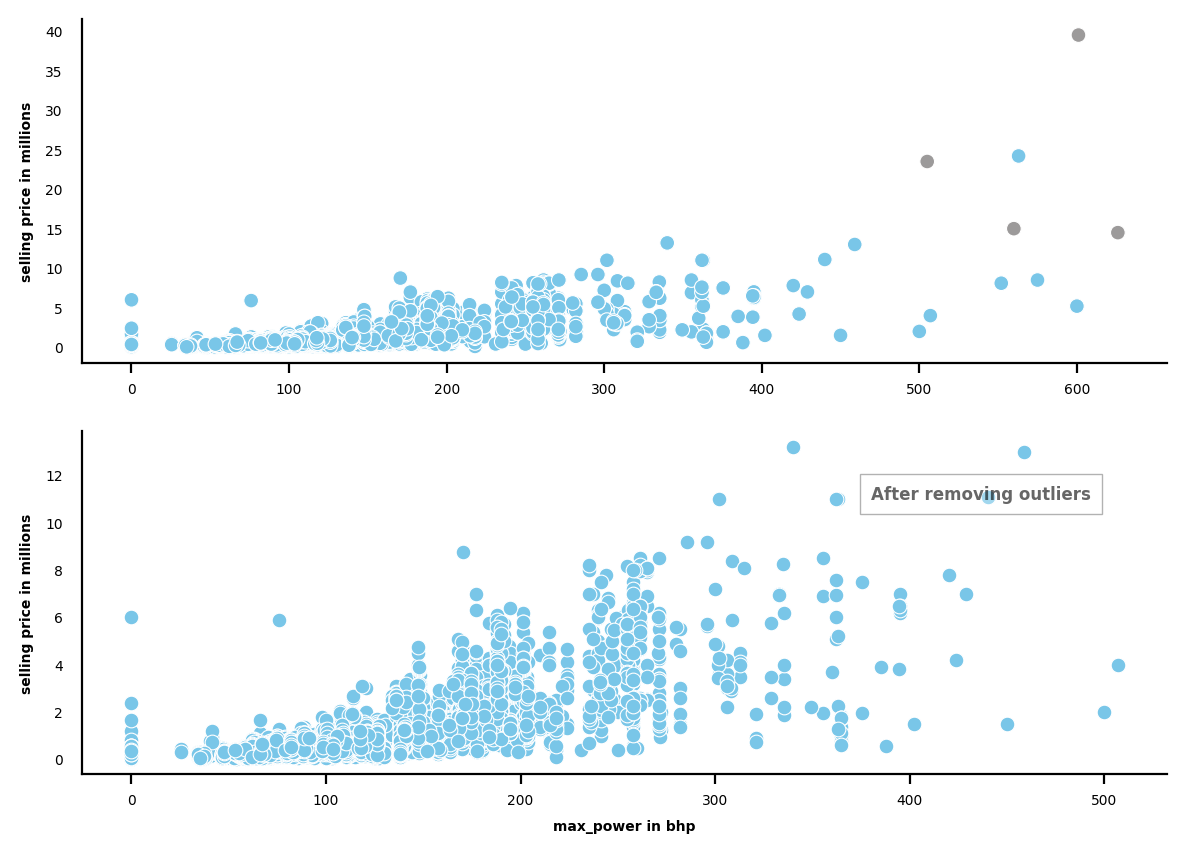

In [42]:
fig = plt.figure(figsize=(7,5))
gs = fig.add_gridspec(2,1)
color = ['#79c6e8' for i in range(cars_data.shape[0])]
color[4967]=color[475]=color[14257]=color[1536]=color[17020]=color[16856]=color[13130]=color[3980]='#9c9a9a'
ax=fig.add_subplot(gs[0,0])
ax.scatter(x=cars_data.max_power,y=cars_data.selling_price/1000000,s=28,
                       color=color, edgecolor='white', linewidth=0.4)
ax.tick_params(labelsize=5, left=False)
ax.set_ylabel(ylabel='selling price in millions', fontsize=5, weight='bold')

ax1=fig.add_subplot(gs[1,0])
rmd_data = cars_data[cars_data['selling_price']<20000000]
rmd_data = rmd_data[rmd_data['max_power']<530]
ax1.scatter(x=rmd_data.max_power,y=rmd_data.selling_price/1000000,s=28,
                       color='#79c6e8', edgecolor='white', linewidth=0.4)
ax1.tick_params(labelsize=5, left=False)
ax1.set_xlabel(xlabel='max_power in bhp', fontsize=5, weight='bold')
ax1.set_ylabel(ylabel='selling price in millions', fontsize=5, weight='bold')
ax1.text(x=380, y=11, s='After removing outliers', fontsize=6, weight='bold', alpha=0.6,
        bbox=dict(facecolor='white', lw=0.5, alpha=0.3))
sns.despine()
plt.show()

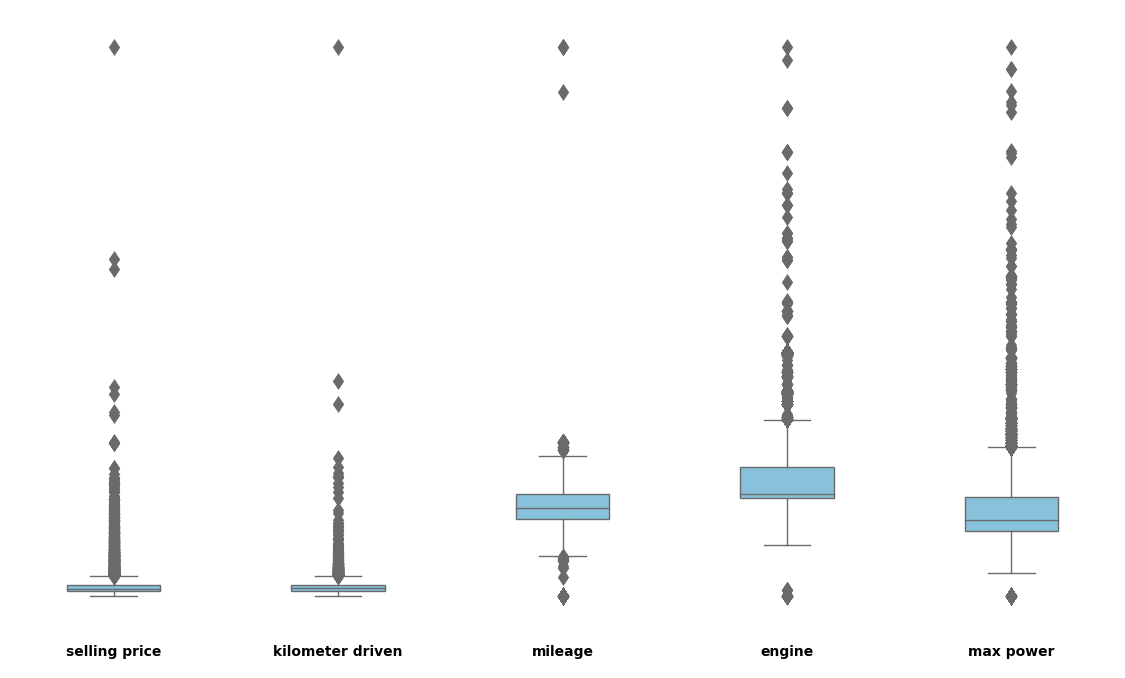

In [43]:
fig = plt.figure(figsize=(7,4))
gs = fig.add_gridspec(1,5)
gs.update(wspace=0.2)
# Selling price---------------------------
ax0=fig.add_subplot(gs[0,0])
ax0_s = sns.boxplot(y=cars_data['selling_price'],width=0.5,color='#79c6e8',linewidth=0.5,fliersize=3)
ax0_s.tick_params(labelsize=5, left=False)
ax0_s.set_xticks([])
ax0_s.set_yticks([])
ax0_s.set_ylabel(None)
ax0_s.set_xlabel('selling price', fontsize=5, weight='bold')
for i in ['top', 'right', 'left', 'bottom']:
    ax0_s.spines[i].set_visible(False)
# Kilometer driven---------------------------
ax1=fig.add_subplot(gs[0,1])
ax1_s = sns.boxplot(y=cars_data['km_driven'],width=0.5,color='#79c6e8',linewidth=0.5,fliersize=3)
ax1_s.tick_params(labelsize=5, left=False)
ax1_s.set_xticks([])
ax1_s.set_yticks([])
ax1_s.set_ylabel(None)
ax1_s.set_xlabel('kilometer driven', fontsize=5, weight='bold')
for i in ['top', 'right', 'left', 'bottom']:
    ax1_s.spines[i].set_visible(False)
# mileage------------------------------------
ax2=fig.add_subplot(gs[0,2])
ax2_s = sns.boxplot(y=cars_data['mileage'],width=0.5,color='#79c6e8',linewidth=0.5,fliersize=3)
ax2_s.tick_params(labelsize=5, left=False)
ax2_s.set_xticks([])
ax2_s.set_yticks([])
ax2_s.set_ylabel(None)
ax2_s.set_xlabel('mileage', fontsize=5, weight='bold')
for i in ['top', 'right', 'left', 'bottom']:
    ax2_s.spines[i].set_visible(False)
# engine--------------------------------------
ax3=fig.add_subplot(gs[0,3])
ax3_s = sns.boxplot(y=cars_data['engine'],width=0.5,color='#79c6e8',linewidth=0.5,fliersize=3)
ax3_s.tick_params(labelsize=5, left=False)
ax3_s.set_xticks([])
ax3_s.set_yticks([])
ax3_s.set_ylabel(None)
ax3_s.set_xlabel('engine', fontsize=5, weight='bold')
for i in ['top', 'right', 'left', 'bottom']:
    ax3.spines[i].set_visible(False)
# max power------------------------------------
ax4=fig.add_subplot(gs[0,4])
ax4_s = sns.boxplot(y=cars_data['max_power'],width=0.5,color='#79c6e8',linewidth=0.5,fliersize=3)
ax4_s.tick_params(labelsize=5, left=False)
ax4_s.set_xticks([])
ax4_s.set_yticks([])
ax4_s.set_ylabel(None)
ax4_s.set_xlabel('max power', fontsize=5, weight='bold')
for i in ['top', 'right', 'left', 'bottom']:
    ax4_s.spines[i].set_visible(False)
    
plt.show()

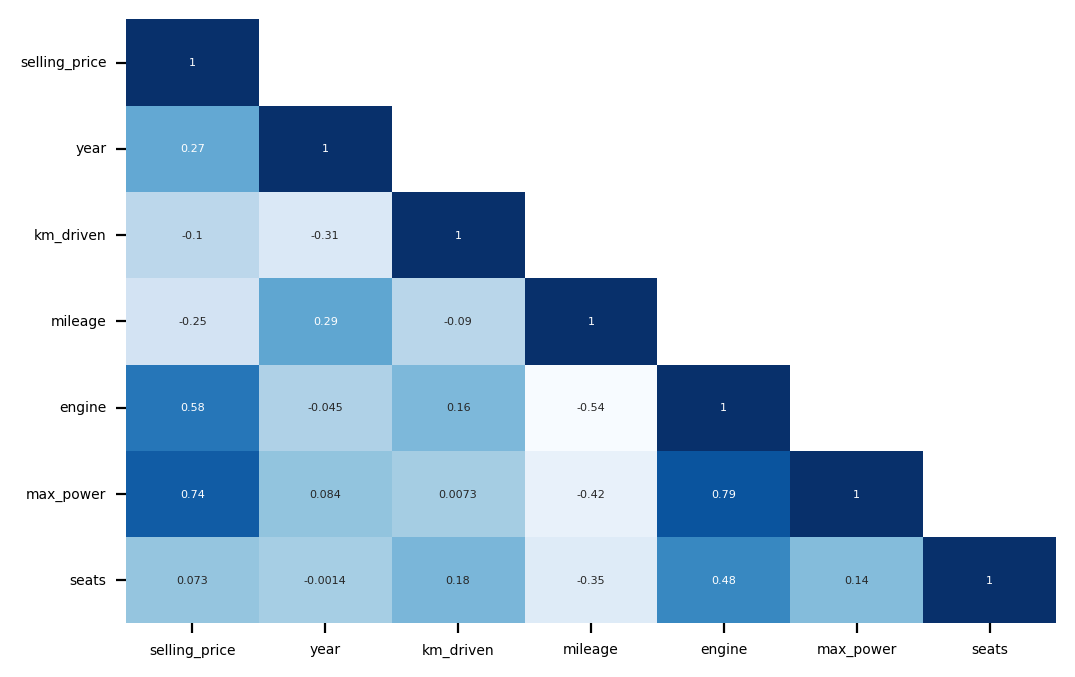

In [44]:
fig = plt.figure(figsize=(6,4))
ax = sns.heatmap(cars_data.corr(), cmap='Blues', mask=np.triu(cars_data.corr(), k=1), cbar=False, annot=True,
                 annot_kws=dict(fontsize=4))
ax.set_facecolor('white')
ax.tick_params(labelsize=5)
plt.show()

Feature Engineering

In [45]:
cars_data.isnull().sum()

selling_price          0
year                   0
seller_type            0
km_driven              0
fuel_type              0
transmission_type      0
mileage                0
engine                59
max_power            103
seats                127
company                0
dtype: int64

In [46]:
cars_data.isnull().sum()

selling_price          0
year                   0
seller_type            0
km_driven              0
fuel_type              0
transmission_type      0
mileage                0
engine                59
max_power            103
seats                127
company                0
dtype: int64

Imputing Null values

In [47]:
for i in ['engine', 'max_power', 'seats']:
    company_name = cars_data[cars_data[i].isnull()]['company'].value_counts().index[0]
    if cars_data[i].nunique()>10:
        values = cars_data[cars_data['company']==company_name][i].mean()
    else:
        values = cars_data[cars_data['company']==company_name][i].median()
        
    cars_data[i].fillna(values, inplace=True)

In [48]:
cars_data.isnull().sum()

selling_price        0
year                 0
seller_type          0
km_driven            0
fuel_type            0
transmission_type    0
mileage              0
engine               0
max_power            0
seats                0
company              0
dtype: int64

In [49]:
cars_data['mileage'] = cars_data['mileage'].replace({'0':np.nan, 0:np.nan})

In [50]:
cars_data.isnull().sum()

selling_price          0
year                   0
seller_type            0
km_driven              0
fuel_type              0
transmission_type      0
mileage              160
engine                 0
max_power              0
seats                  0
company                0
dtype: int64

In [51]:
cars_data.company.unique()

array(['Maruti', 'Hyundai', 'Ford', 'Mahindra', 'Tata', 'Renault',
       'Nissan', 'Mini', 'Mercedes-Benz', 'Toyota', 'Fiat', 'Volkswagen',
       'Honda', 'Chevrolet', 'Ambassador', 'Datsun', 'Kia', 'BMW',
       'Mitsubishi', 'Audi', 'Skoda', 'Land', 'Jaguar', 'Daewoo',
       'Bentley', 'MG', 'Isuzu', 'Porsche', 'Volvo', 'Lexus', 'Jeep',
       'Premier', 'Maserati', 'Force', 'Lamborghini', 'ISUZU', 'Ferrari',
       'OpelCorsa', 'Mercedes-AMG', 'DC', 'Rolls-Royce', 'Opel'],
      dtype=object)

In [52]:
company_name = cars_data[cars_data['mileage'].isnull()]['company'].value_counts().index[0]
if cars_data['mileage'].nunique()>10:
    values = cars_data[cars_data['company']==company_name]['mileage'].mean()
else:
    values = cars_data[cars_data['company']==company_name]['mileage'].median()
        
cars_data['mileage'].fillna(values, inplace=True)

In [53]:
cars_data.isnull().sum()

selling_price        0
year                 0
seller_type          0
km_driven            0
fuel_type            0
transmission_type    0
mileage              0
engine               0
max_power            0
seats                0
company              0
dtype: int64

Removing Outliers

In [54]:
cars_data = cars_data[cars_data['selling_price'] < 20000000]
cars_data = cars_data[cars_data['km_driven'] < 1000000]
cars_data = cars_data[cars_data['mileage'] < 100]
cars_data = cars_data[cars_data['engine'] < 6100]
cars_data = cars_data[cars_data['max_power'] < 530]
cars_data = cars_data.reset_index(drop=True)

Selecting Top 15 companies for better prediction

In [55]:
company_name = cars_data.company.value_counts().index[:15]
for i in range(cars_data.shape[0]):
    if cars_data['company'][i] in company_name:
         continue
    else:
        cars_data['company'][i] = 'others'

Splitting Data into Training and Testing

In [56]:
x = cars_data.iloc[:,1:]
y = cars_data['selling_price']


Transforming numeric and categorical data

In [57]:
numeric_features = [0,2,5,6,7,8]
numeric_transformer = Pipeline(
    steps=[("scaler", StandardScaler())]
)

categorical_features = [1,3,4,9]
categorical_transformer = OneHotEncoder(handle_unknown="ignore")

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)


Model Building

In [65]:
def do_prediction(clf):
    
    xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.20,random_state=25)
    # training the classifier on the dataset
    clf.fit(xtrain, ytrain)
    
    #Do prediction and evaluting the prediction
    prediction = clf.predict(xtest)
    cross_validation_score_train = cross_val(xtrain, ytrain, clf)
    cross_validation_score_test = cross_val(xtest, ytest, clf)
    error = mean_absolute_error(ytest, prediction)
    
    return error, cross_validation_score_train, cross_validation_score_test

def cross_val(xtrain, ytrain, clf):
    
    # Applying k-Fold Cross Validation
    accuracies = cross_val_score(estimator = clf, X = xtrain, y = ytrain, cv = 5)
    return accuracies.mean()

Linear Regressor

In [66]:
model_1 = LinearRegression()
clf = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", model_1)]
)
error, score_train, score_test = do_prediction(clf)

print('Linear Regression MAE: {}'.format(round(error,2)))
print('Cross validation score train: {}'.format(round(score_train,2)))
print('Cross validation score test: {}'.format(round(score_test,2)))

Linear Regression MAE: 230038.13
Cross validation score train: 0.69
Cross validation score test: 0.66


Decision Tree Regressor

In [67]:
model_2 = DecisionTreeRegressor()
clf = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", model_2)]
)
error, score_train, score_test = do_prediction(clf)

print('Decision Tree Regressor MAE: {}'.format(round(error,2)))
print('Cross validation score train: {}'.format(round(score_train,2)))
print('Cross validation score test: {}'.format(round(score_test,2)))

Decision Tree Regressor MAE: 120561.1
Cross validation score train: 0.86
Cross validation score test: 0.76


Random Forest Regressor

In [68]:
model_3 = RandomForestRegressor()
clf = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", model_3)]
)
error, score_train, score_test = do_prediction(clf)

print('Random Forest Regressor MAE: {}'.format(round(error,2)))
print('Cross validation score train: {}'.format(round(score_train,2)))
print('Cross validation score test: {}'.format(round(score_test,2)))

Random Forest Regressor MAE: 98091.47
Cross validation score train: 0.92
Cross validation score test: 0.85


Random Forest Regressor Hyperparameter tuning

In [69]:
best_model = RandomForestRegressor(n_estimators=400,
                                  min_samples_split=10,
                                  min_samples_leaf=1,
                                  max_features='sqrt',
                                  max_depth=60,
                                  bootstrap=False)
clf = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", best_model)]
)

error, score_train, score_test = do_prediction(clf)
print('Random Forest with hyperparameter tuning MAE: {}'.format(round(error,2)))
print('Cross validation score train: {}'.format(round(score_train,2)))
print('Cross validation score test: {}'.format(round(score_test,2)))

Random Forest with hyperparameter tuning MAE: 99274.01
Cross validation score train: 0.91
Cross validation score test: 0.84
